In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

# data = pd.read_csv('/Users/wenghong/ML-Assignment/healthcare-dataset-stroke-data.csv')
# data = pd.read_csv('/Users/jacksheng/Downloads/ML assignment/healthcare-dataset-stroke-data.csv')
data = pd.read_csv('/Users/jacksheng/Downloads/archive (2) 2/stroke_data.csv')


What is the problem: nowsadays, younger generation due to alot of stress and unheathly lifestyle, has lead to a lot of health problem. One of these problem is stroke. However, people these days didnt actually care about their health due to lack of time, therefore, we develop a model that can help to predict whether a person have a high chance of getting stroke or low chance of getting stroke. 

After this test, it can help people to decide when to go to hospital for a check. This could save their time especially for people nowadays that are struggle to live in this hustle and bustle city.



**EDA - Exploratory Data Analysis**
**1.1 General**


In [13]:
#Check if there are NA values.
data.duplicated().sum()

0

In [14]:
num_nan_rows = data.isna().sum(axis=1).astype(bool).sum()
total_rows = data.shape[0]
print('Number of records in total: {}\nNumber of records that has NaN values: {}'.format(total_rows, num_nan_rows))

# remove NaN values
data= data.dropna()
print('Number of records after removing NaN values: {}'.format(data.shape[0]))
data["sex"].fillna(0, inplace = True)

Number of records in total: 40910
Number of records that has NaN values: 3
Number of records after removing NaN values: 40907


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40907 non-null  float64
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   Residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


In [16]:
# Get the total number of features
num_features = len(data.columns)

# Get the total number of rows
num_rows = len(data)

# Get the total number of columns
num_columns = len(data.columns)

print("Total number of features:", num_features)
print("Total number of rows:", num_rows)
print("Total number of columns:", num_columns)

Total number of features: 11
Total number of rows: 40907
Total number of columns: 11


In [17]:
#show the first 5 row of data 
data.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [18]:
data.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000
mean,0.555162,51.327303,0.213851,0.127729,0.821326,3.461095,0.514851,122.079679,30.406488,0.488572,0.500159
std,0.496954,21.624171,0.410028,0.333792,0.383083,0.780934,0.499786,57.561951,6.835305,0.499875,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


To analyze the data in a better way, I decided to convert the coding to the real values. I copy them into a variable called df and then do the data analyze

In [19]:
df = data.copy()
# df.gender[df['sex'] == 0] = 'Female'
# df.gender[df['sex'] == 1] = 'Male'

df.hypertension[df['hypertension'] == 0] = 'Not had hypertension'
df.hypertension[df['hypertension'] == 1] = 'Had hypertension'

df.heart_disease[df['heart_disease'] == 0] = 'Not had heart disease'
df.heart_disease[df['heart_disease'] == 1] = 'Had heart disease'

df.ever_married[df['ever_married'] == 0] = 'No'
df.ever_married[df['ever_married'] == 1] = 'Yes'

df.work_type[df['work_type'] == 0] = 'Never worked'
df.work_type[df['work_type'] == 1] = 'Children'
df.work_type[df['work_type'] == 2] = 'Govt job'
df.work_type[df['work_type'] == 3] = 'Self-employed'
df.work_type[df['work_type'] == 4] = 'Private'

df.Residence_type[df['Residence_type'] == 0] = 'Urban'
df.Residence_type[df['Residence_type'] == 1] = 'Rural'

df.smoking_status[df['smoking_status'] == 0] = 'Never smoked'
df.smoking_status[df['smoking_status'] == 1] = 'Smokes'

df.stroke[df['stroke'] == 0] = 'No'
df.stroke[df['stroke'] == 1] = 'Yes'

In [20]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
sex,2
age,111
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,2903
bmi,370
smoking_status,2


1. The "work_type" column will need One Hot Encoder to process in nominal categorical data.
2. "age", "avg_glucose_level" and "bmi" columns will be processed using Binning or Scaling.

**1.2 Frequency of the value of the features in the dataset.**

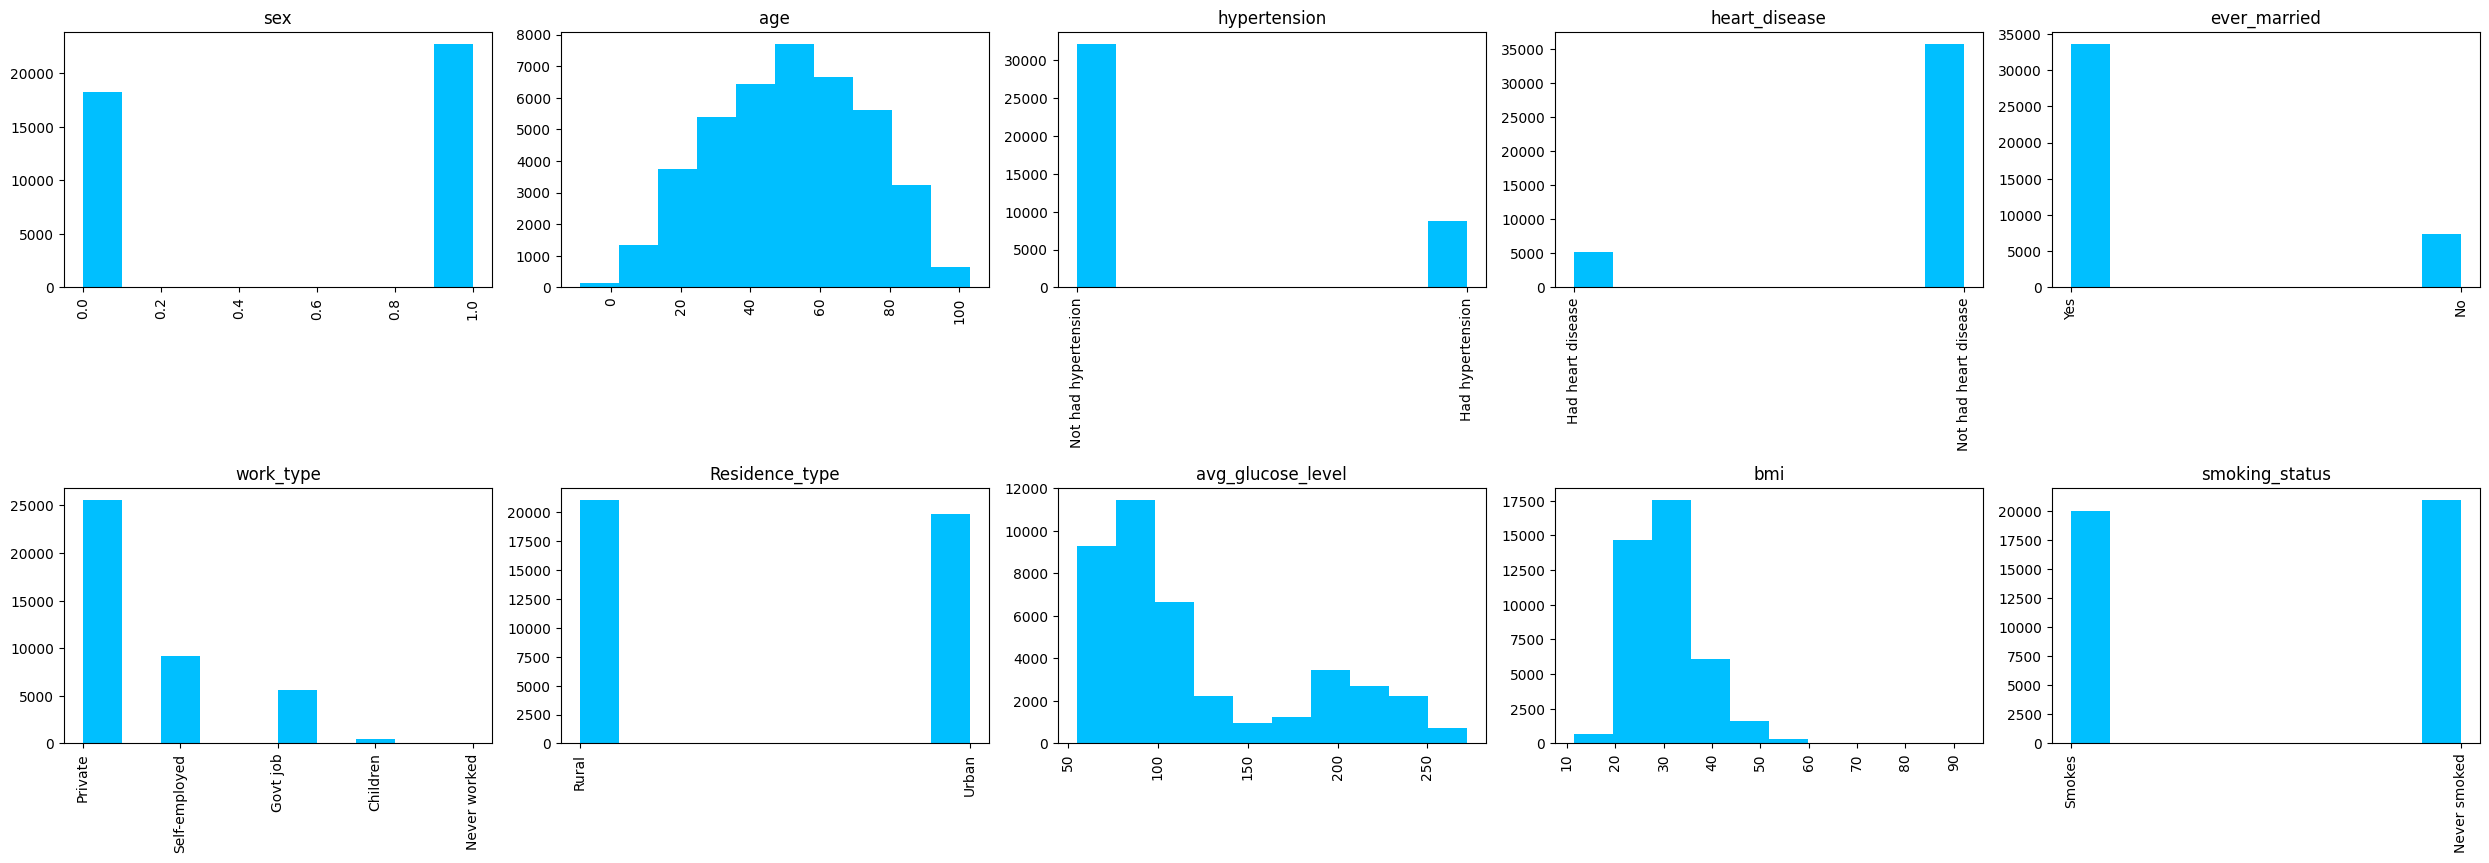

In [21]:
# All data columns except for color
feature_cols = [x for x in df.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

From the graph, There can't be a negative age, so i drop these rows.

In [22]:
data = data.drop(data[data.age < 0].index)
df = df.drop(df[df.age < 0].index)
len(data. index)

40849

Check the data balance


stroke
0    20447
1    20402
Name: count, dtype: int64


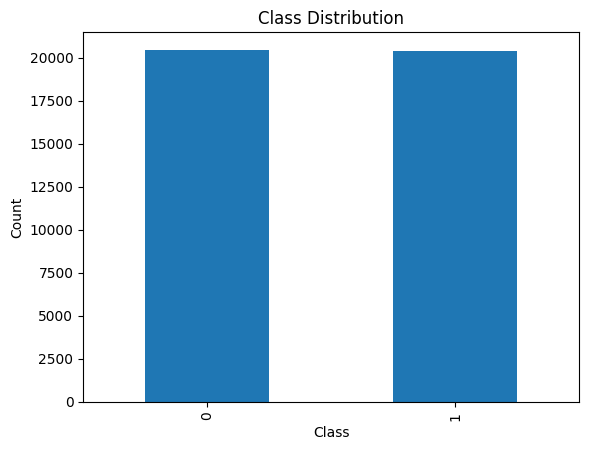

stroke
0    0.500551
1    0.499449
Name: proportion, dtype: float64
Imbalance Ratio: 1.0022056661111656


In [23]:
# Count the number of samples for each class
class_counts = data['stroke'].value_counts()
print(class_counts)

# Plot the class distribution
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Calculate class proportions
class_proportions = data['stroke'].value_counts(normalize=True)
print(class_proportions)

# Compute imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print("Imbalance Ratio:", imbalance_ratio)


([<matplotlib.patches.Wedge at 0x130a6aa90>,
 [Text(0.001920753835331581, 1.1099983381540282, 'Stroke'),
  Text(-0.001920753835331224, -1.1099983381540282, 'No-Stroke')],
 [Text(0.00105554940500204, 0.6099990867332947, '49.9%'),
  Text(-0.0010555494050018437, -0.6099990867332947, '50.1%')])

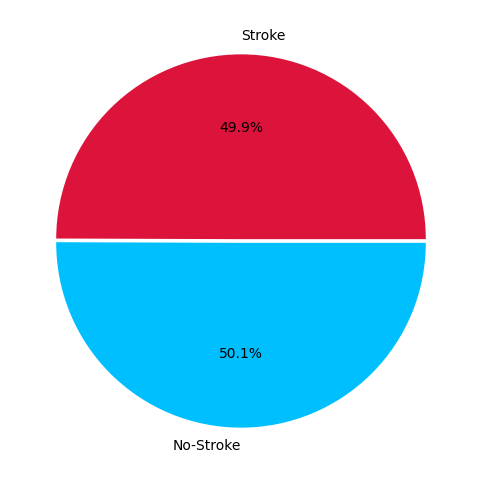

In [24]:
# Traget values frequency
plt.figure(figsize=(8,6))
labels = ['Stroke', 'No-Stroke']
sizes = [df['stroke'].value_counts()['Yes'],df['stroke'].value_counts()['No']]
colors = ['crimson', 'deepskyblue']
explode = (0.01,0.01)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = df)

The prediction column classes are balanced which are 49.9% to 50.1 %.

**1.3 Correlation between each feature and stroke**

<Axes: title={'center': 'Correlation with Stroke'}>

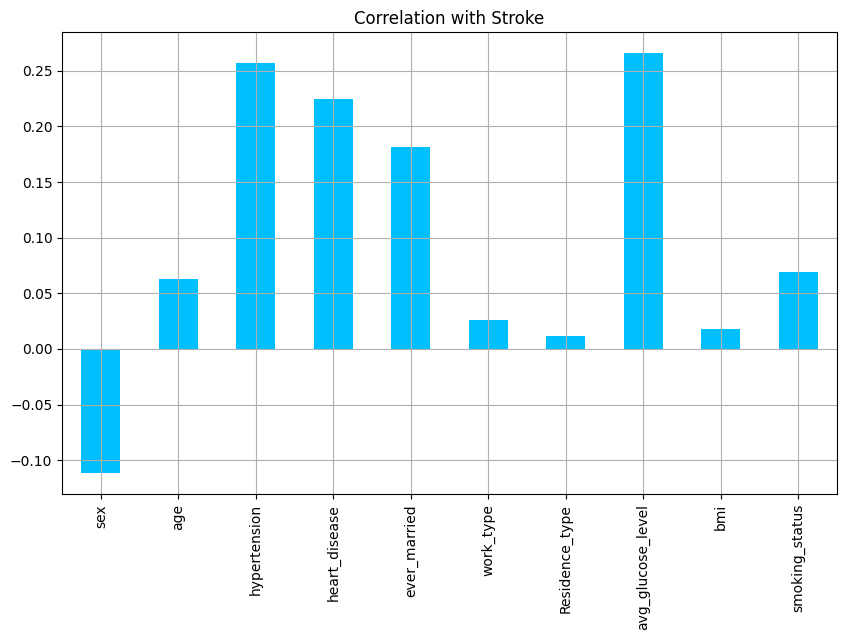

In [25]:
data.drop('stroke', axis=1).corrwith(data.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Stroke",color="deepskyblue")

The features "bmi", "Residence_type", "work_type" are least correlated with Storke. All other features have a significant correlation with Stroke.

**1.4 Correlation between any two features**

<Axes: >

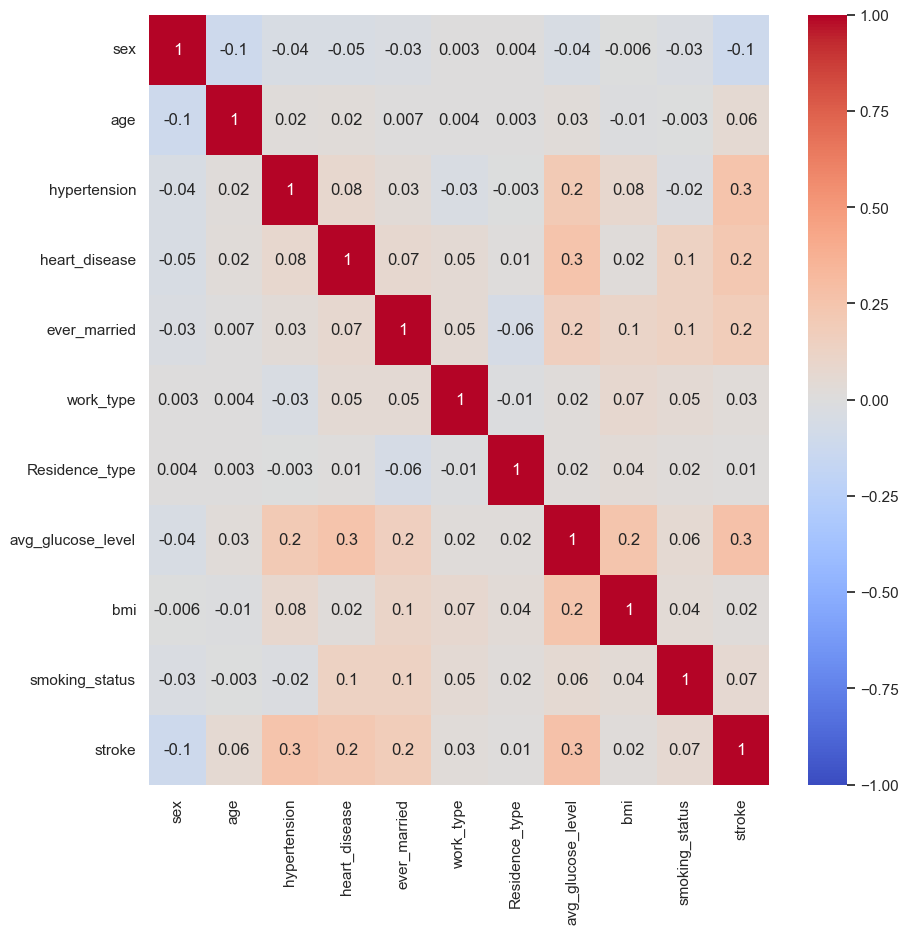

In [26]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

There is no correlation higher than +- 0.3 for a pair of features. Therefore, I cannot drop features at this time.

**1.5 Stroke frequency by categorical and numeric features**

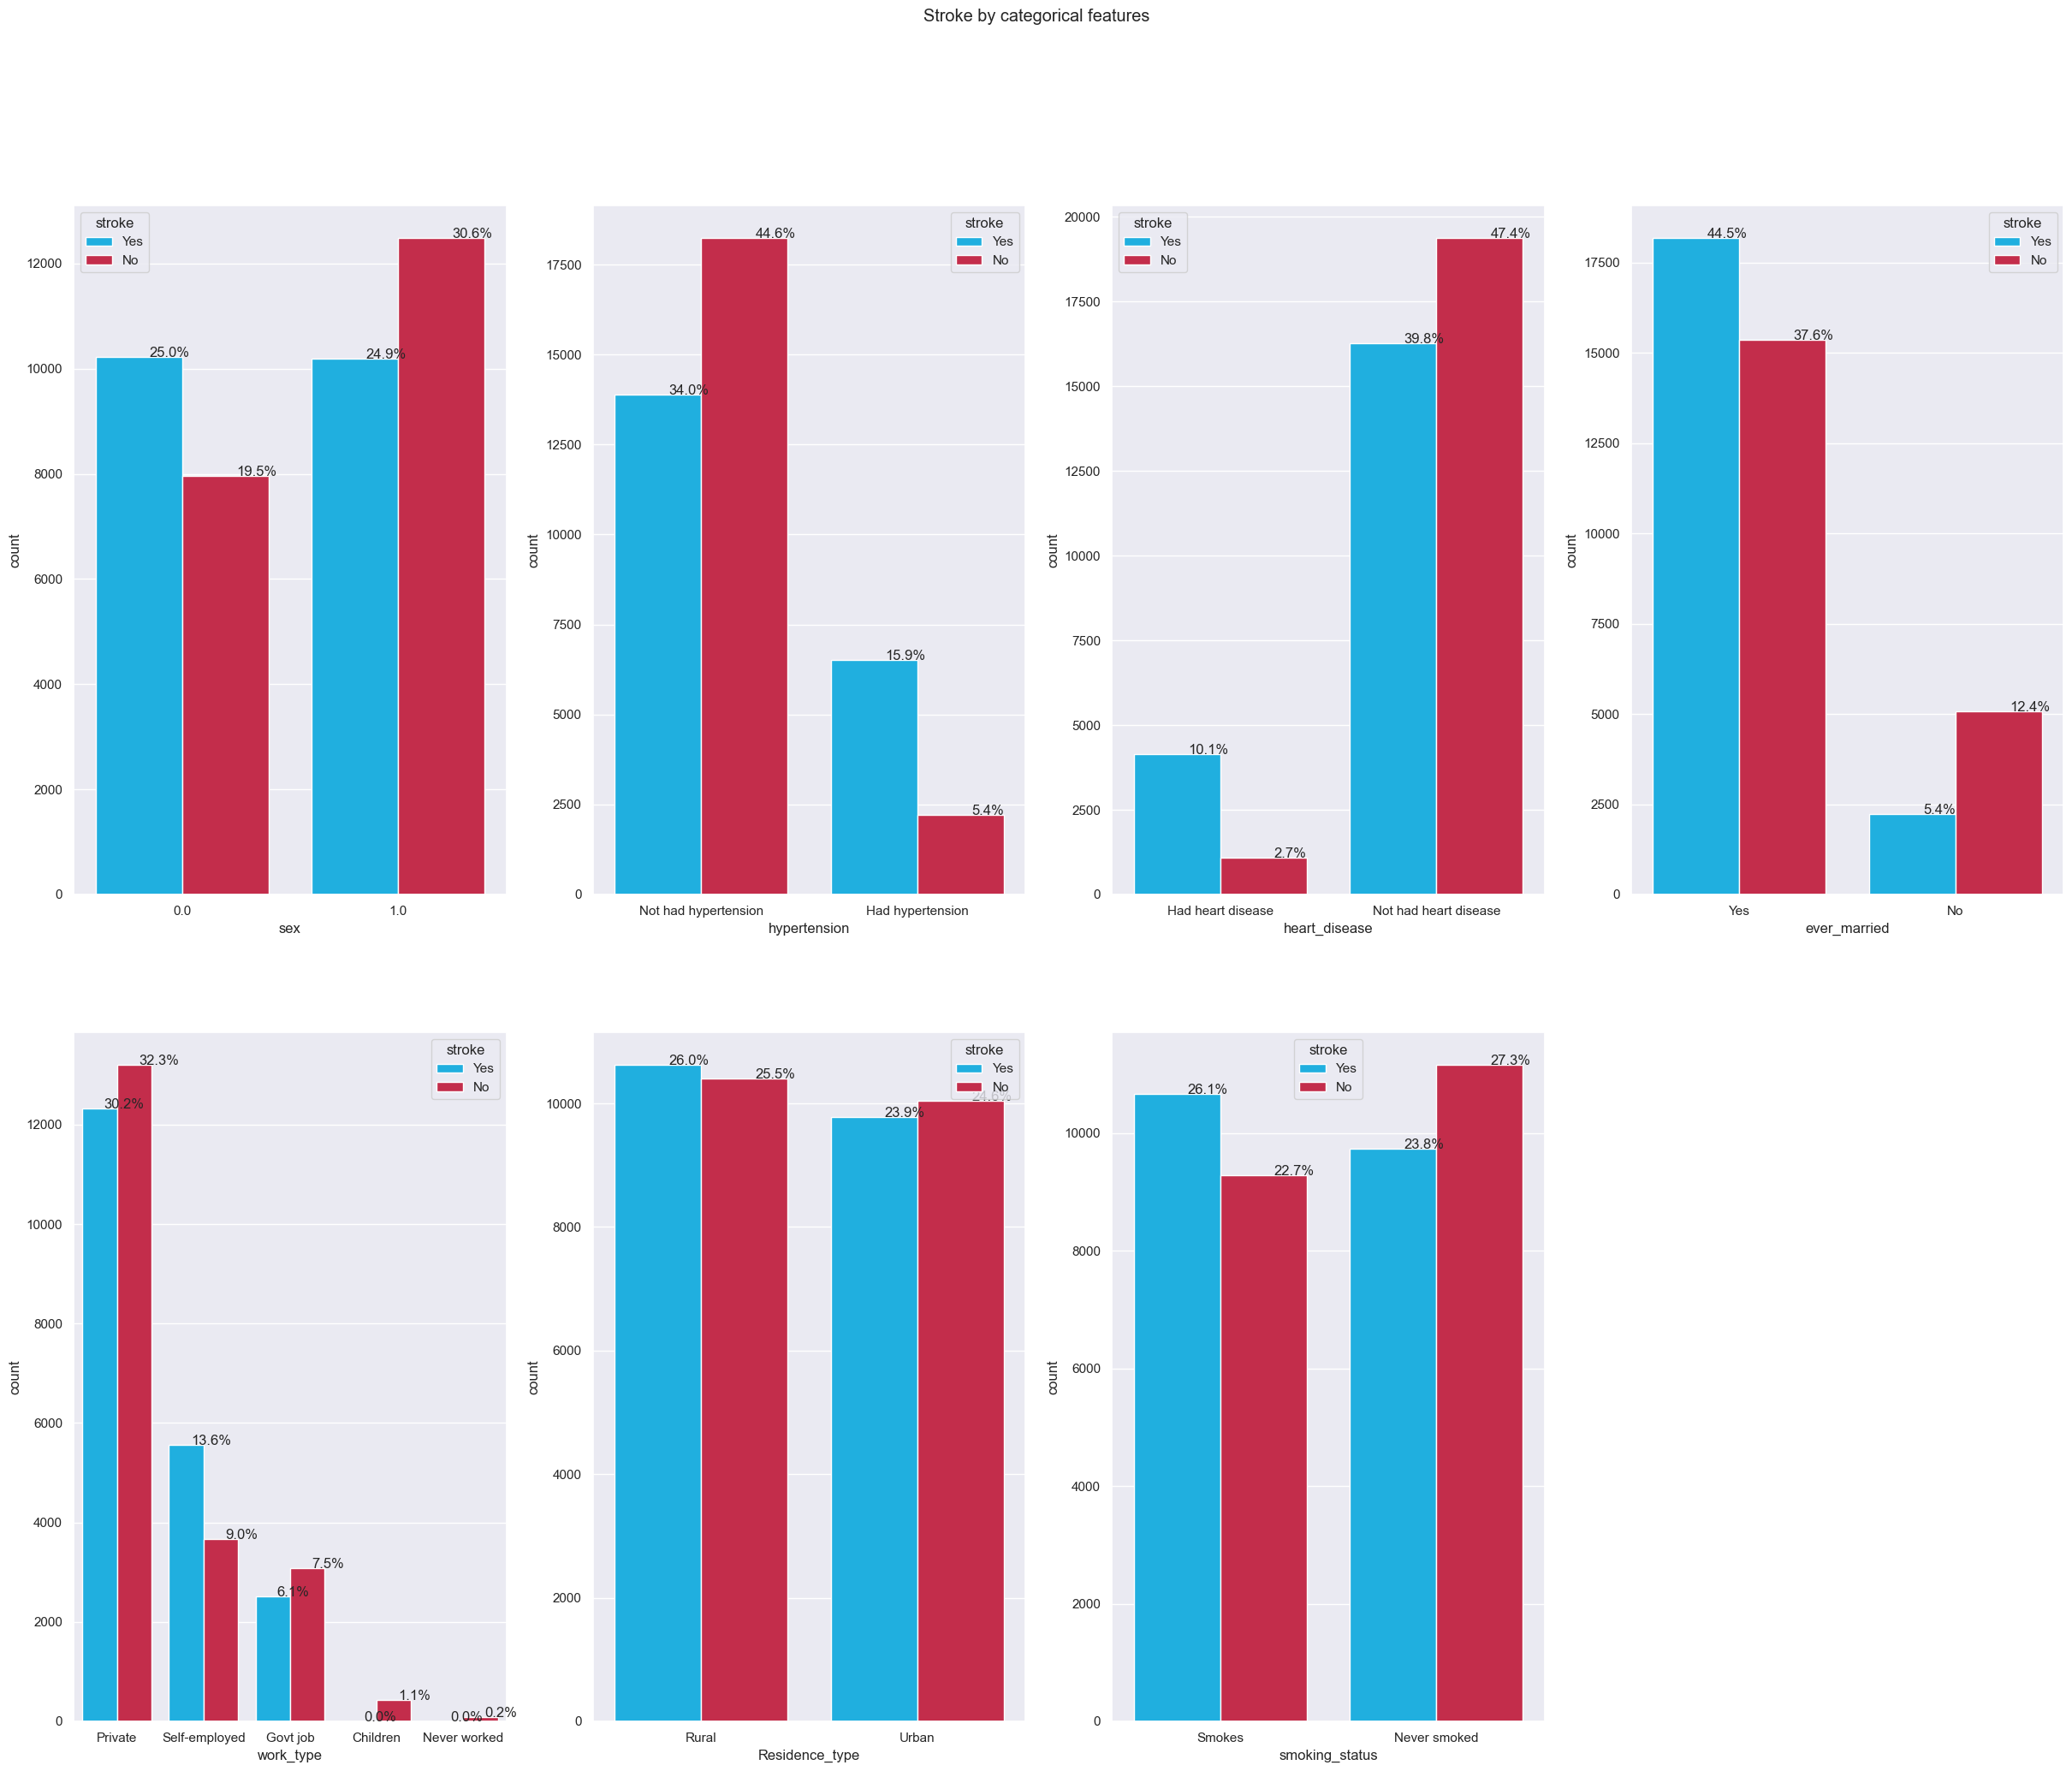

In [27]:
features = [x for x in df.columns if x not in ['stroke','bmi','age','avg_glucose_level']]
plt.figure(figsize = (30,23))
plt.suptitle('Stroke by categorical features')
#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)
    x = sns.countplot(x = i[1] ,hue='stroke', data=df, palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/df.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

- Gender has no effect on stroke.

- Smoking, hypertension and heart disease increase the risk of stroke.

- People whose type of work is "self employee" have a higher risk of stroke than other types of work.

- There is no clear connection between residence type and stroke, but there is a slight tendency to stroke in a rural residence type.

In [28]:
#scale the data before pairplot
data_pairplot = data.copy()
float_columns = [x for x in data.columns if x in ['bmi','age','avg_glucose_level']]

sc = StandardScaler()
data_pairplot[float_columns] = sc.fit_transform(data_pairplot[float_columns])
data_pairplot.head(4)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.538271,0,1,1,4,1,1.852490,0.906191,1,1
1,1.0,-0.436528,0,1,1,4,0,-0.280621,0.306375,0,1
2,0.0,0.445433,0,0,1,4,1,0.854131,0.584338,1,1
3,1.0,-0.482947,1,0,1,3,0,0.904344,-0.937145,0,1


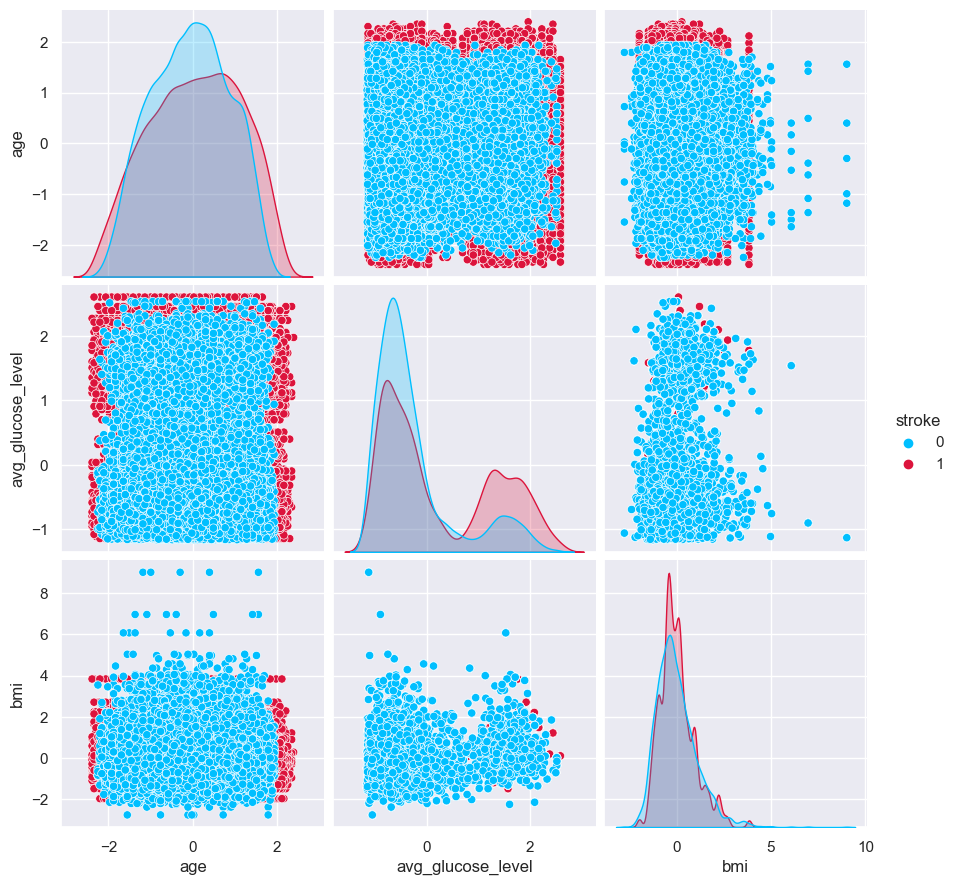

In [29]:
float_columns = [x for x in data_pairplot.columns if x in ['bmi','age','avg_glucose_level']]
sns.set_context('notebook')
sns.pairplot(data_pairplot[float_columns + ['stroke']], 
             hue='stroke', 
             hue_order=[0,1],
             height=3,
             palette={0:'deepskyblue',1:'crimson'})

Combining of float features does not seem to explain stroke.

**1.6 The effect of combining categorical features on stroke**

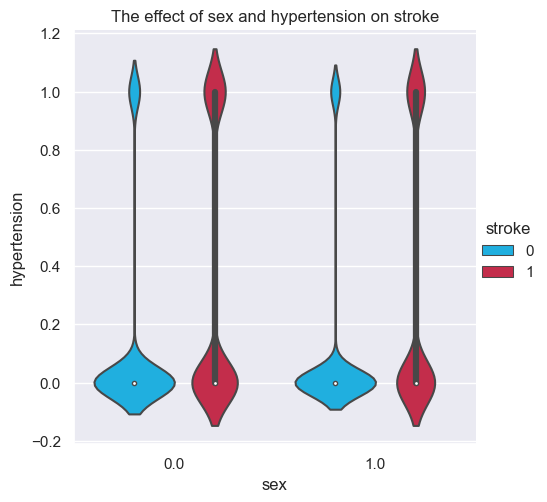

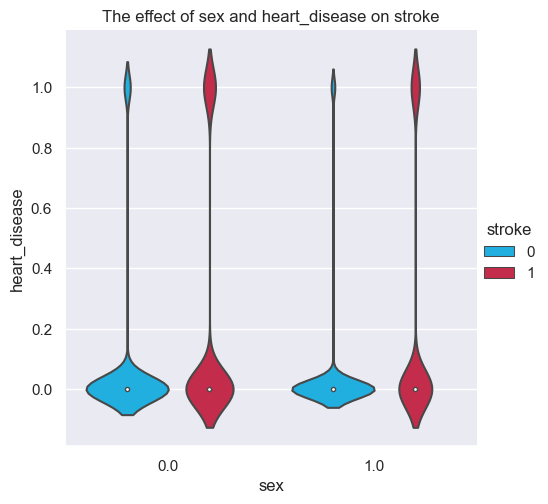

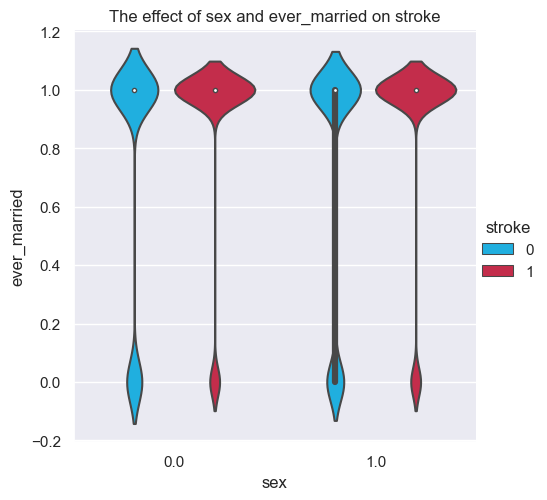

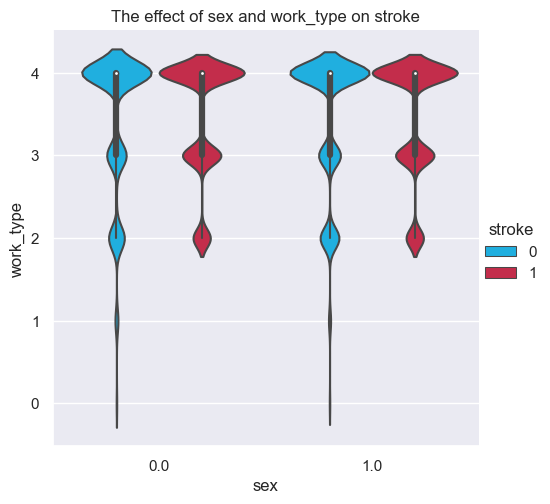

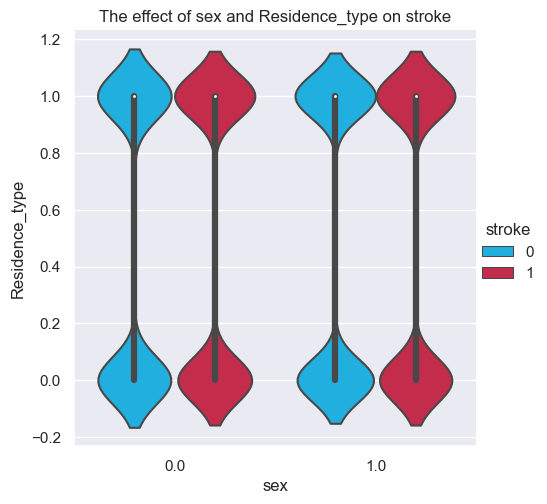

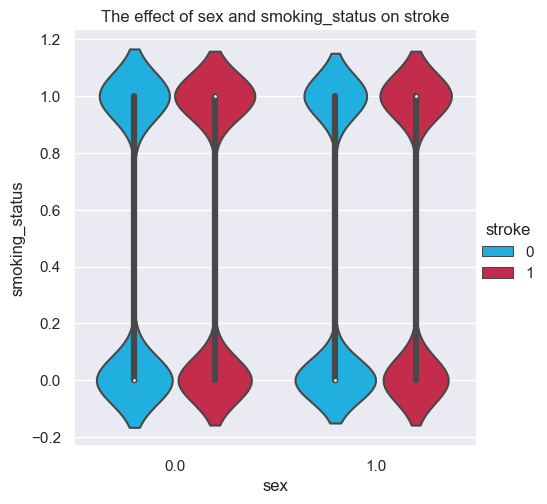

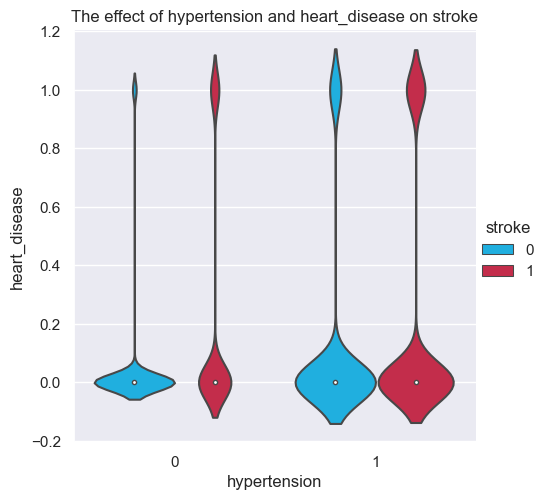

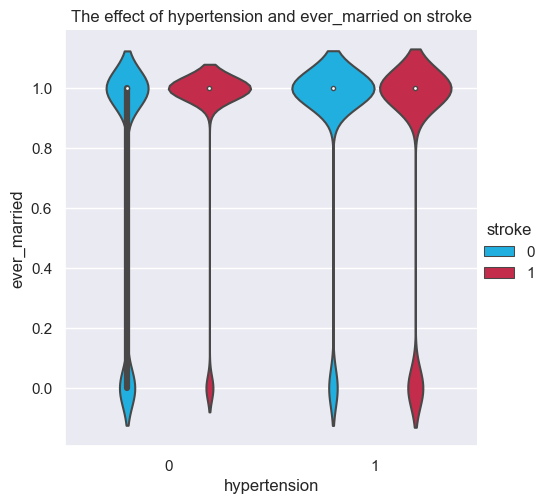

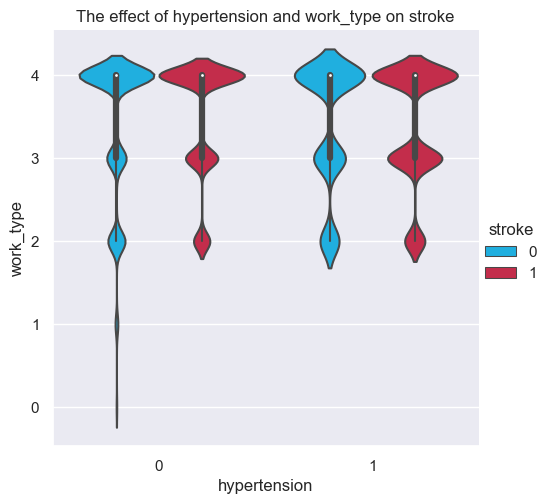

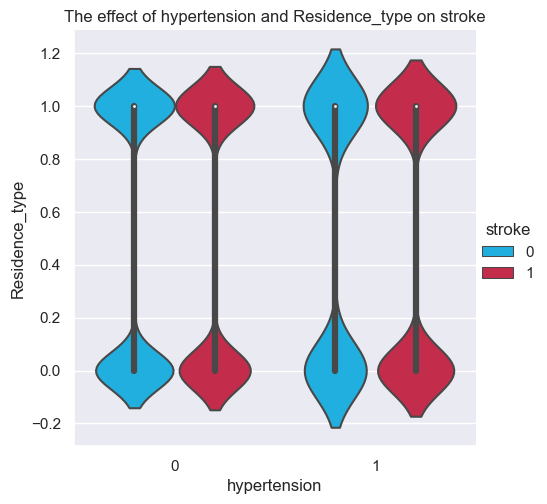

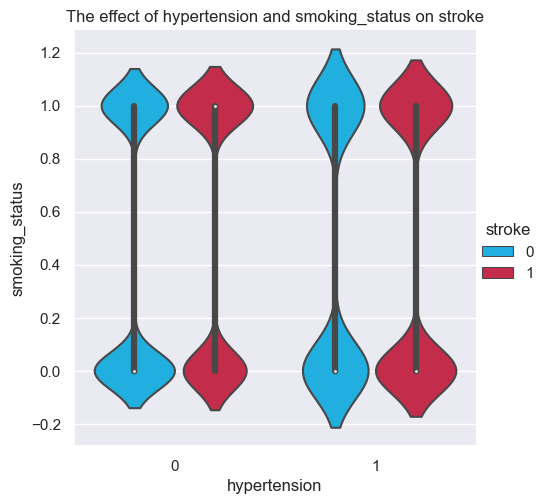

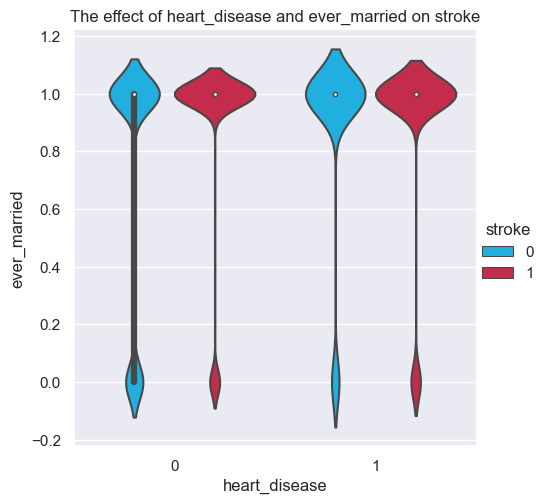

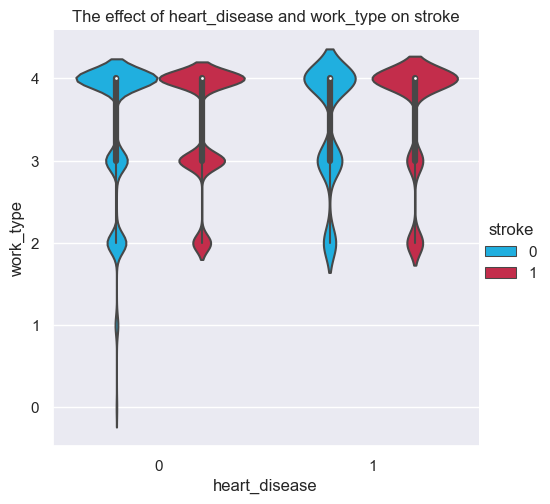

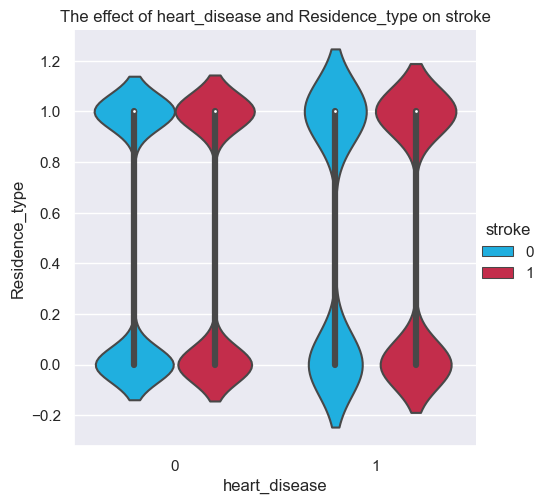

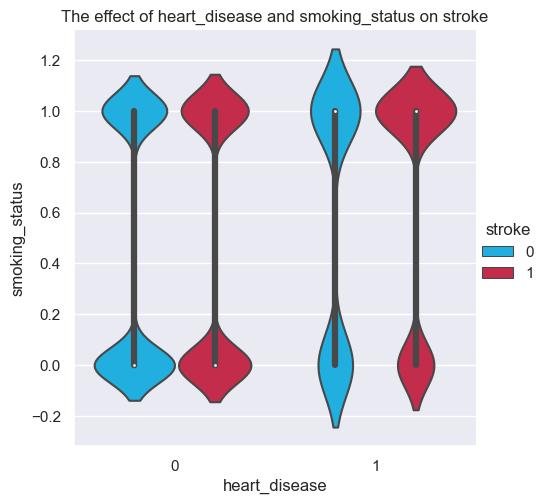

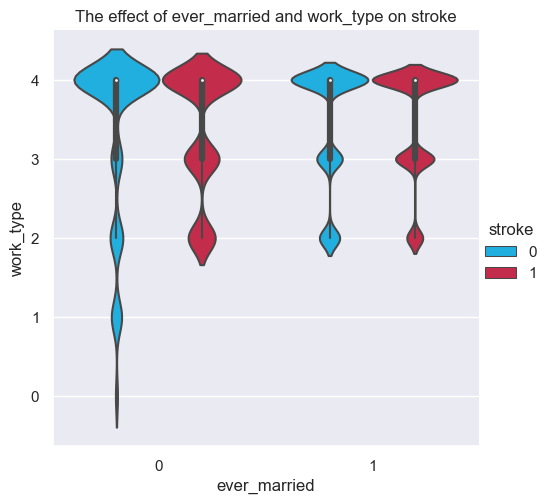

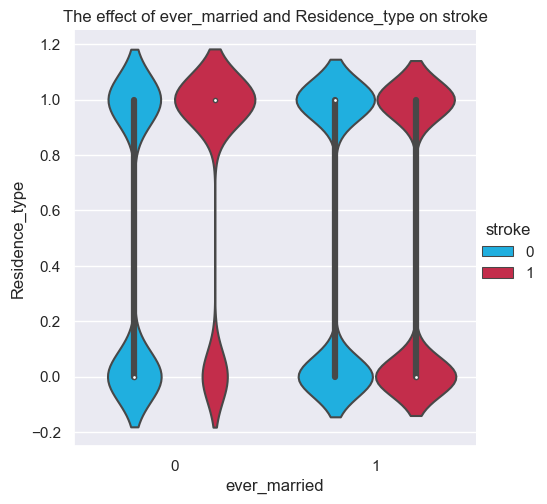

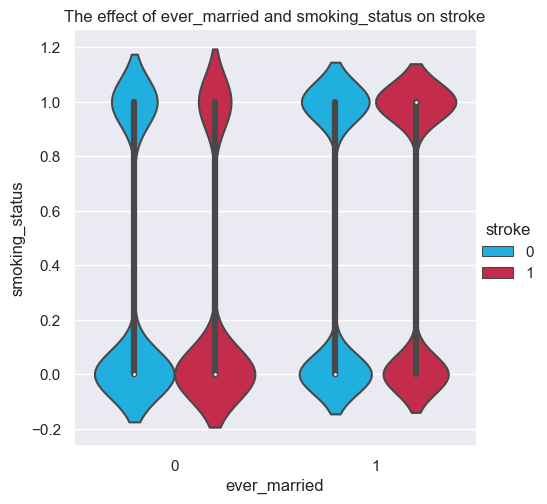

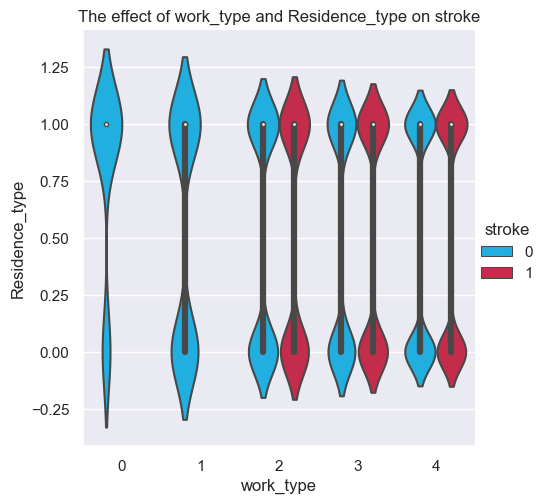

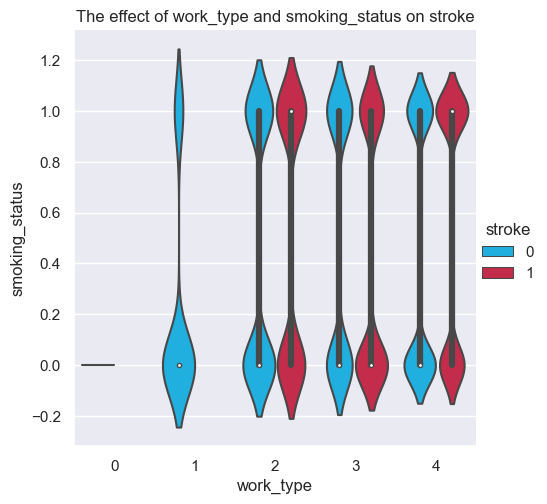

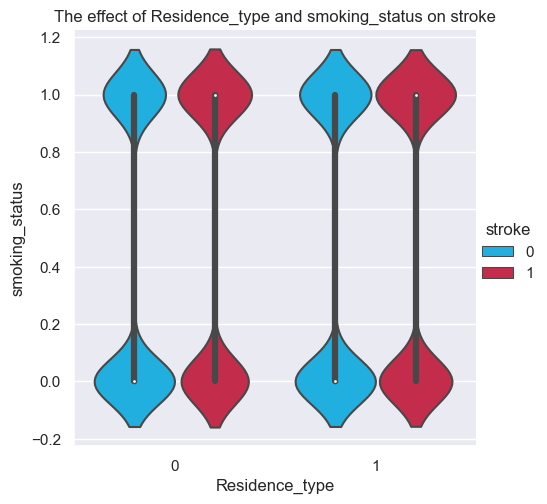

In [30]:
for i in range (len(features)):
  for x in range (len(features)-i-1):
    sns.catplot(data=data, x=features[i], y=features[i+x+1], hue="stroke", kind="violin",palette = ['deepskyblue','crimson']).set(title="The effect of "+features[i] + " and "+features[i+x+1]+" on stroke")

- Acording to these graphs, sex and Residence_type both togather increase the risk of stroke.

- Acording to these graphs, sex and smoking_status both togather increase the risk of stroke.

- Acording to these graphs, hypertension and Residence_type both togather increase the risk of stroke.

- Acording to these graphs, hypertension and smoking_status both togather increase the risk of stroke.

- Acording to these graphs, heart disease and Residence_type both togather increase the risk of stroke.

- Acording to these graphs, heart disease and smoking_status both togather increase the risk of stroke.

- Acording to these graphs, ever_married and smoking_status both togather increase the risk of stroke.

 Acording to these graphs, Residence_type and smoking_status both togather increase the risk of stroke.

**1.7 Numeric features distributions**

**Bmi**

<Figure size 1200x500 with 0 Axes>

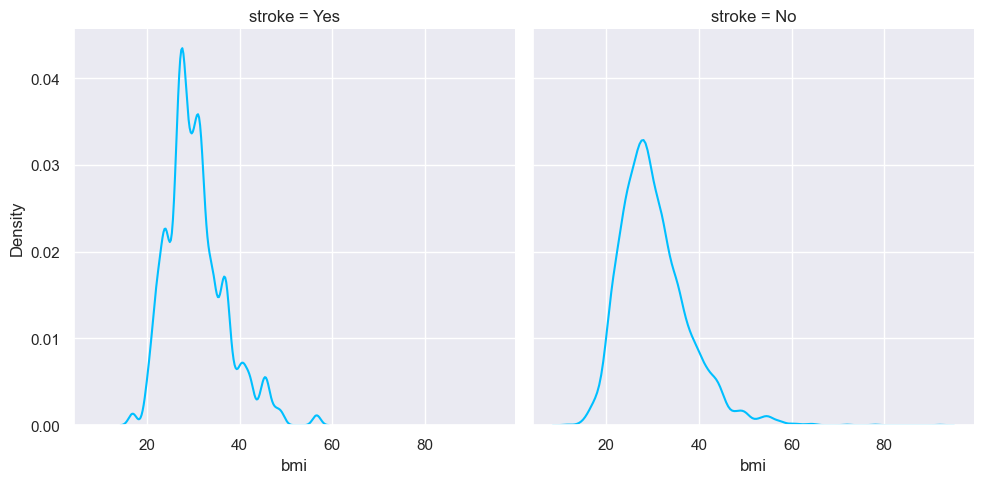

In [31]:
plt.figure(figsize=(12,5))
sns.displot(x='bmi', col='stroke' , data = df, kind="kde" ,color = 'deepskyblue')

Binning the data to see the distribution clearly

In [32]:
bmi = pd.cut( df['bmi'],bins=[0,18.5,25,30,35,max(df['bmi'])],labels=['Underweight','Normal','Overweight','Obesity','Extremly Obesity'])
bmi_temp = pd.crosstab(df['stroke'],bmi,rownames=['Stroke'])
bmi_temp = bmi_temp.astype(float)
bmi_temp

bmi,Underweight,Normal,Overweight,Obesity,Extremly Obesity
Stroke,,,,,
No,322.0,4612.0,6454.0,4605.0,4454.0
Yes,118.0,3689.0,7280.0,5145.0,4170.0


In [33]:
bmi_temp_sum_lst=list(bmi_temp.transpose().sum().values)
for idx in range(bmi_temp.values.shape[0]):
    bmi_temp.values[idx]= bmi_temp.values[idx]/bmi_temp_sum_lst[idx]*100

bmi_temp

bmi,Underweight,Normal,Overweight,Obesity,Extremly Obesity
Stroke,,,,,
No,1.574803,22.555876,31.564533,22.521641,21.783147
Yes,0.578375,18.081561,35.682776,25.218116,20.439173


<Figure size 1200x2000 with 0 Axes>

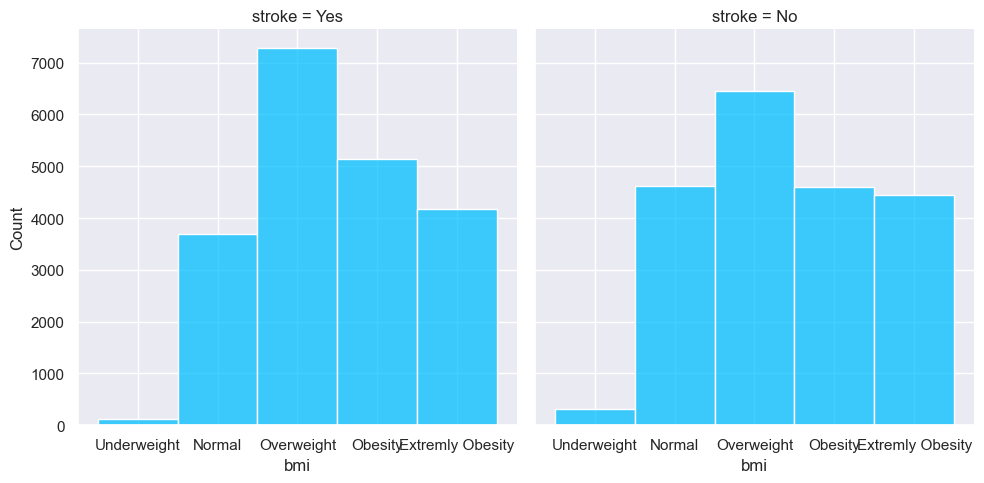

In [34]:
plt.figure(figsize=(12,20))
sns.displot(data=df,col='stroke',x=bmi,color='deepskyblue')

The bmi's distribution of target column values are similar.

**Age**

<Figure size 1200x500 with 0 Axes>

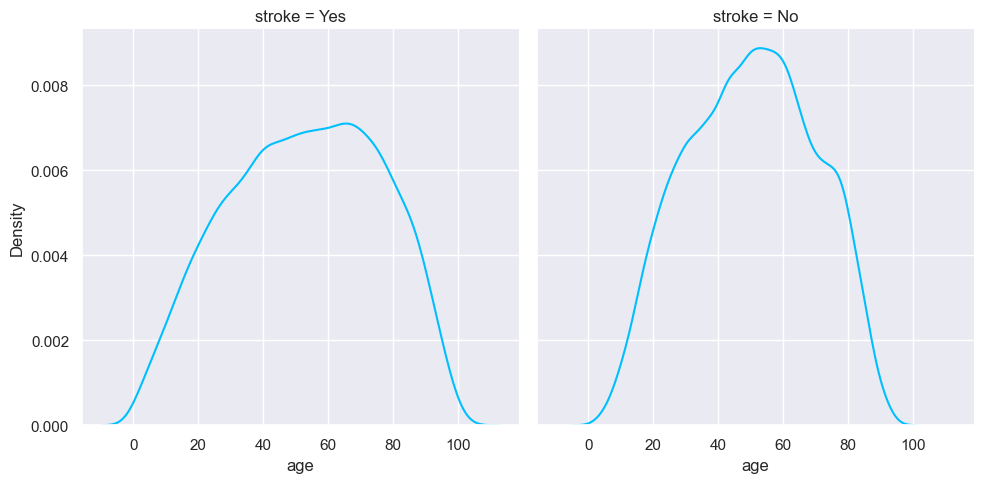

In [35]:
plt.figure(figsize=(12,5))
sns.displot(x='age', col='stroke' , data = df, kind="kde" ,color = 'deepskyblue')

Binning the data to see the distribution clearly

In [36]:
age = pd.cut( df['age'],bins=[0,30,45,55,70,max(df['age'])],labels=['0-30','30-45','45-55','55-70','70+'])
age_temp = pd.crosstab(df['stroke'],age,rownames=['Stroke'])
age_temp = age_temp.astype(float)
age_temp

age,0-30,30-45,45-55,55-70,70+
Stroke,,,,,
No,3883.0,4588.0,3555.0,4790.0,3631.0
Yes,4093.0,3811.0,2797.0,4319.0,5359.0


In [37]:
age_temp_sum_lst=list(age_temp.transpose().sum().values)
for idx in range(age_temp.values.shape[0]):
    age_temp.values[idx]= age_temp.values[idx]/age_temp_sum_lst[idx]*100

age_temp

age,0-30,30-45,45-55,55-70,70+
Stroke,,,,,
No,18.990561,22.438500,17.386414,23.426420,17.758106
Yes,20.084401,18.700623,13.724913,21.193385,26.296678


<Figure size 1000x600 with 0 Axes>

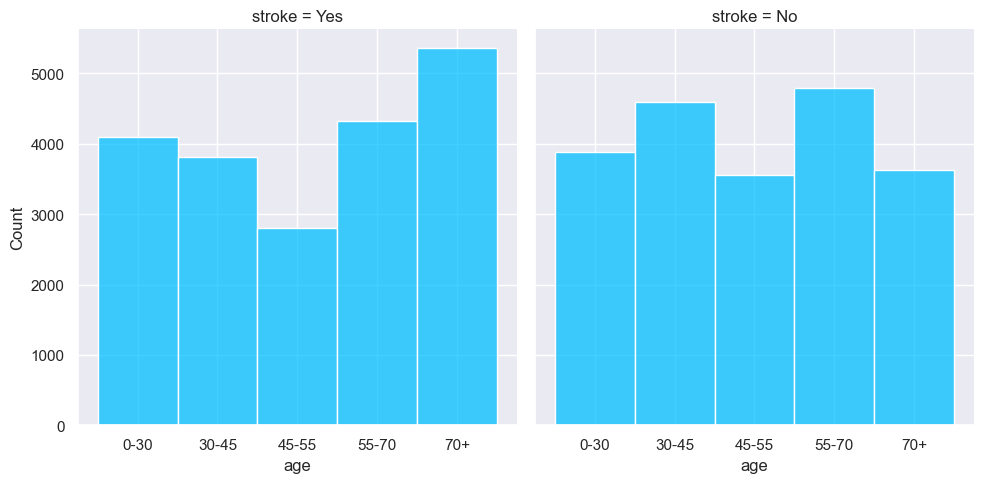

In [38]:
plt.figure(figsize=(10,6))
sns.displot(data=df,col='stroke',x=age,color='deepskyblue')

The age's distribution of target column values are similar.

**avg_glucose_level**

<Figure size 1200x500 with 0 Axes>

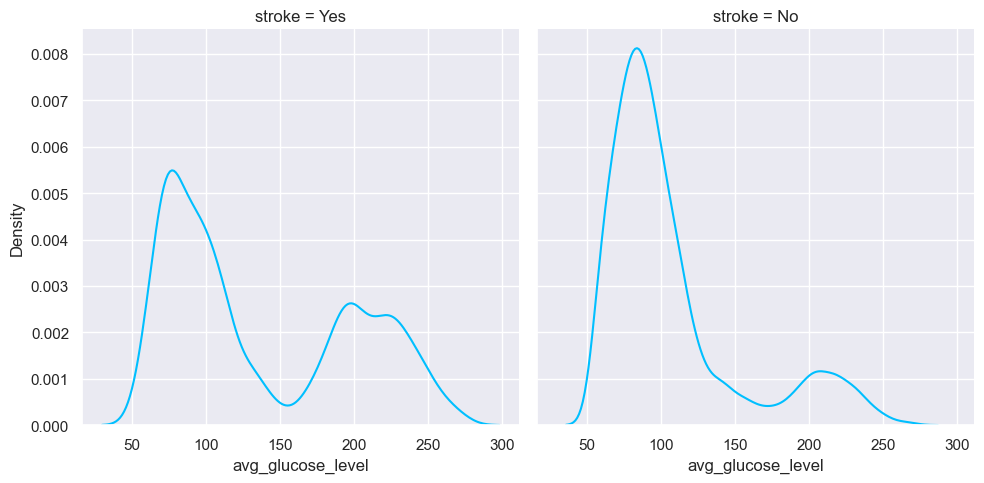

In [39]:
plt.figure(figsize=(12,5))
sns.displot(x='avg_glucose_level', col='stroke' , data = df, kind="kde" ,color = 'deepskyblue')

Binning the data to see the distribution clearly

In [40]:
avg_glucose_level = pd.cut( df['avg_glucose_level'],bins=[0,100,125,max(df['avg_glucose_level'])],labels=['normal','impaired glucose','diabetic'])
avg_glucose_level_temp = pd.crosstab(df['stroke'],avg_glucose_level,rownames=['Stroke'])
avg_glucose_level_temp = avg_glucose_level_temp.astype(float)
avg_glucose_level_temp

avg_glucose_level,normal,impaired glucose,diabetic
Stroke,,,
No,12483.0,3871.0,4093.0
Yes,8688.0,2892.0,8822.0


In [41]:
avg_glucose_level_temp_sum_lst=list(avg_glucose_level_temp.transpose().sum().values)
for idx in range(avg_glucose_level_temp.values.shape[0]):
    avg_glucose_level_temp.values[idx]= avg_glucose_level_temp.values[idx]/avg_glucose_level_temp_sum_lst[idx]*100

avg_glucose_level_temp

avg_glucose_level,normal,impaired glucose,diabetic
Stroke,,,
No,61.050521,18.931873,20.017606
Yes,42.584060,14.175081,43.240859


<Figure size 1000x600 with 0 Axes>

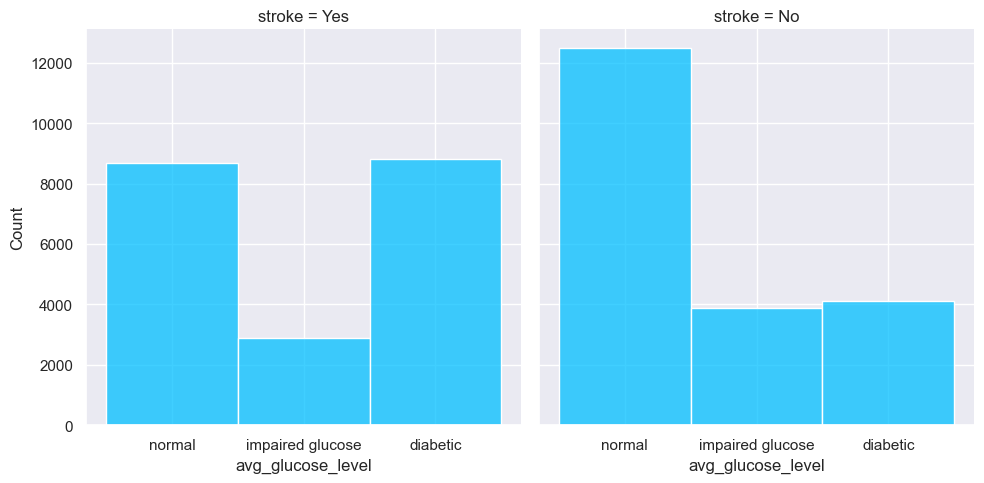

In [42]:
plt.figure(figsize=(10,6))
sns.displot(data=df,col='stroke',x=avg_glucose_level,color='deepskyblue')

The distribution of the average glucose level of the target column values is different. This feature is an explanatory feature; People with high blood glucose are more likely to have a stroke than those with normal values.

**1.8 Distribution of numeric Features by stroke and medical features**

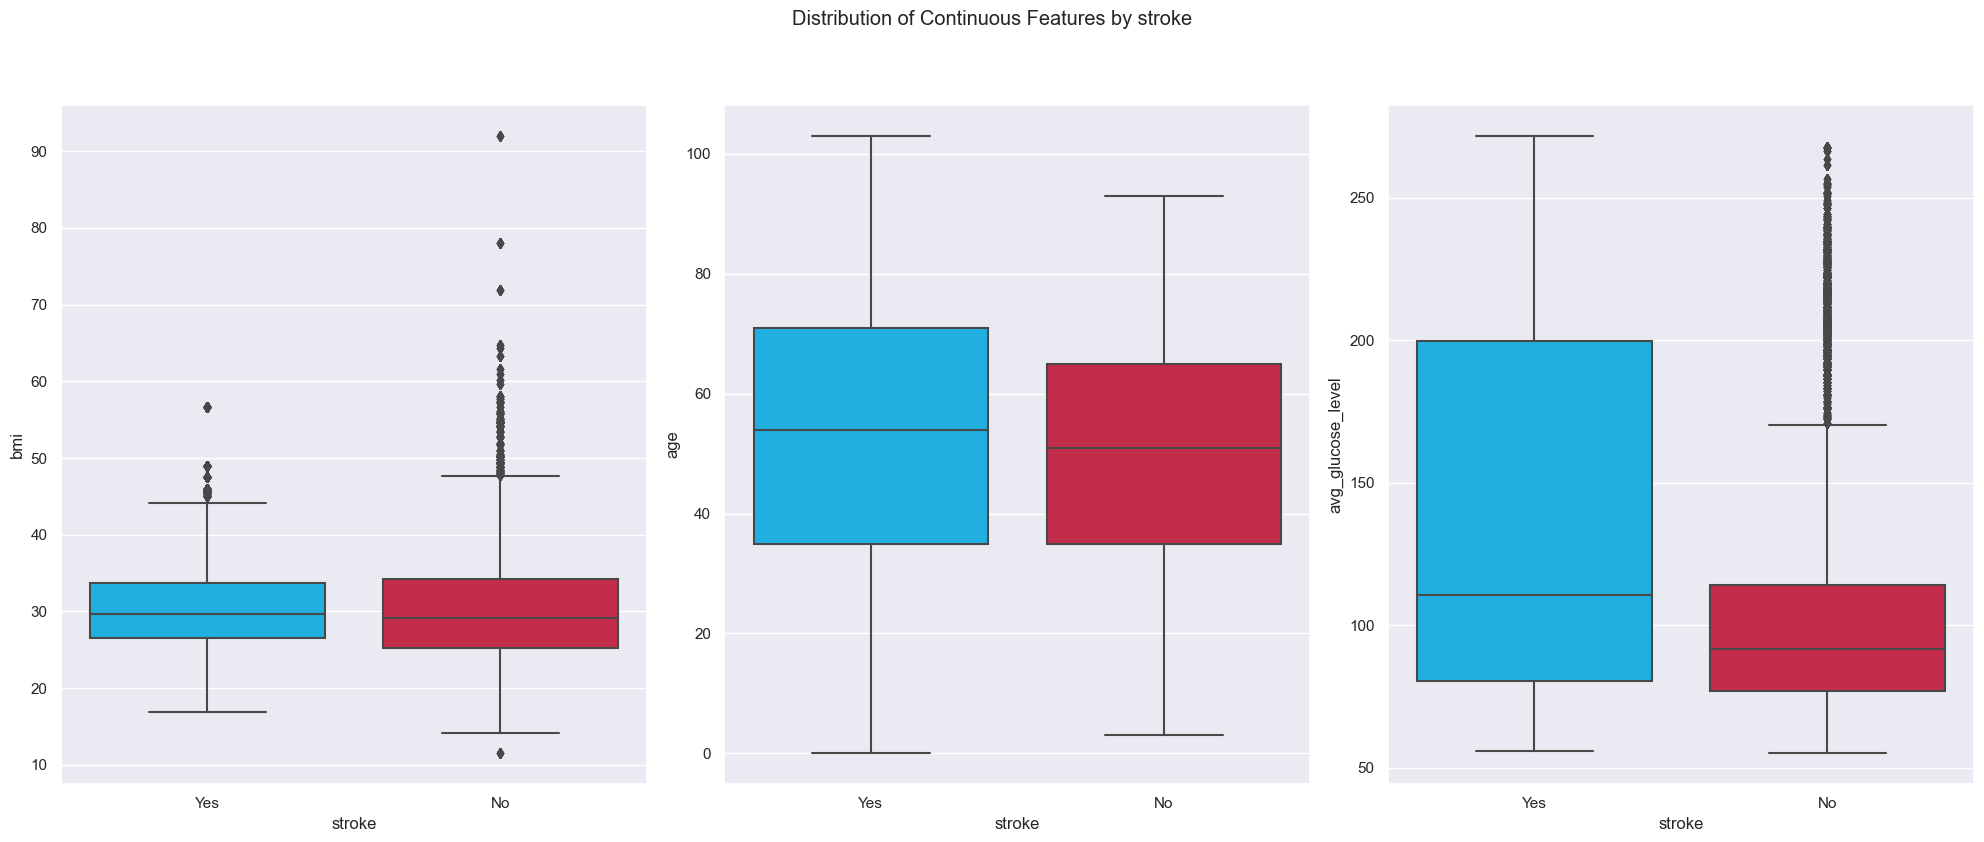

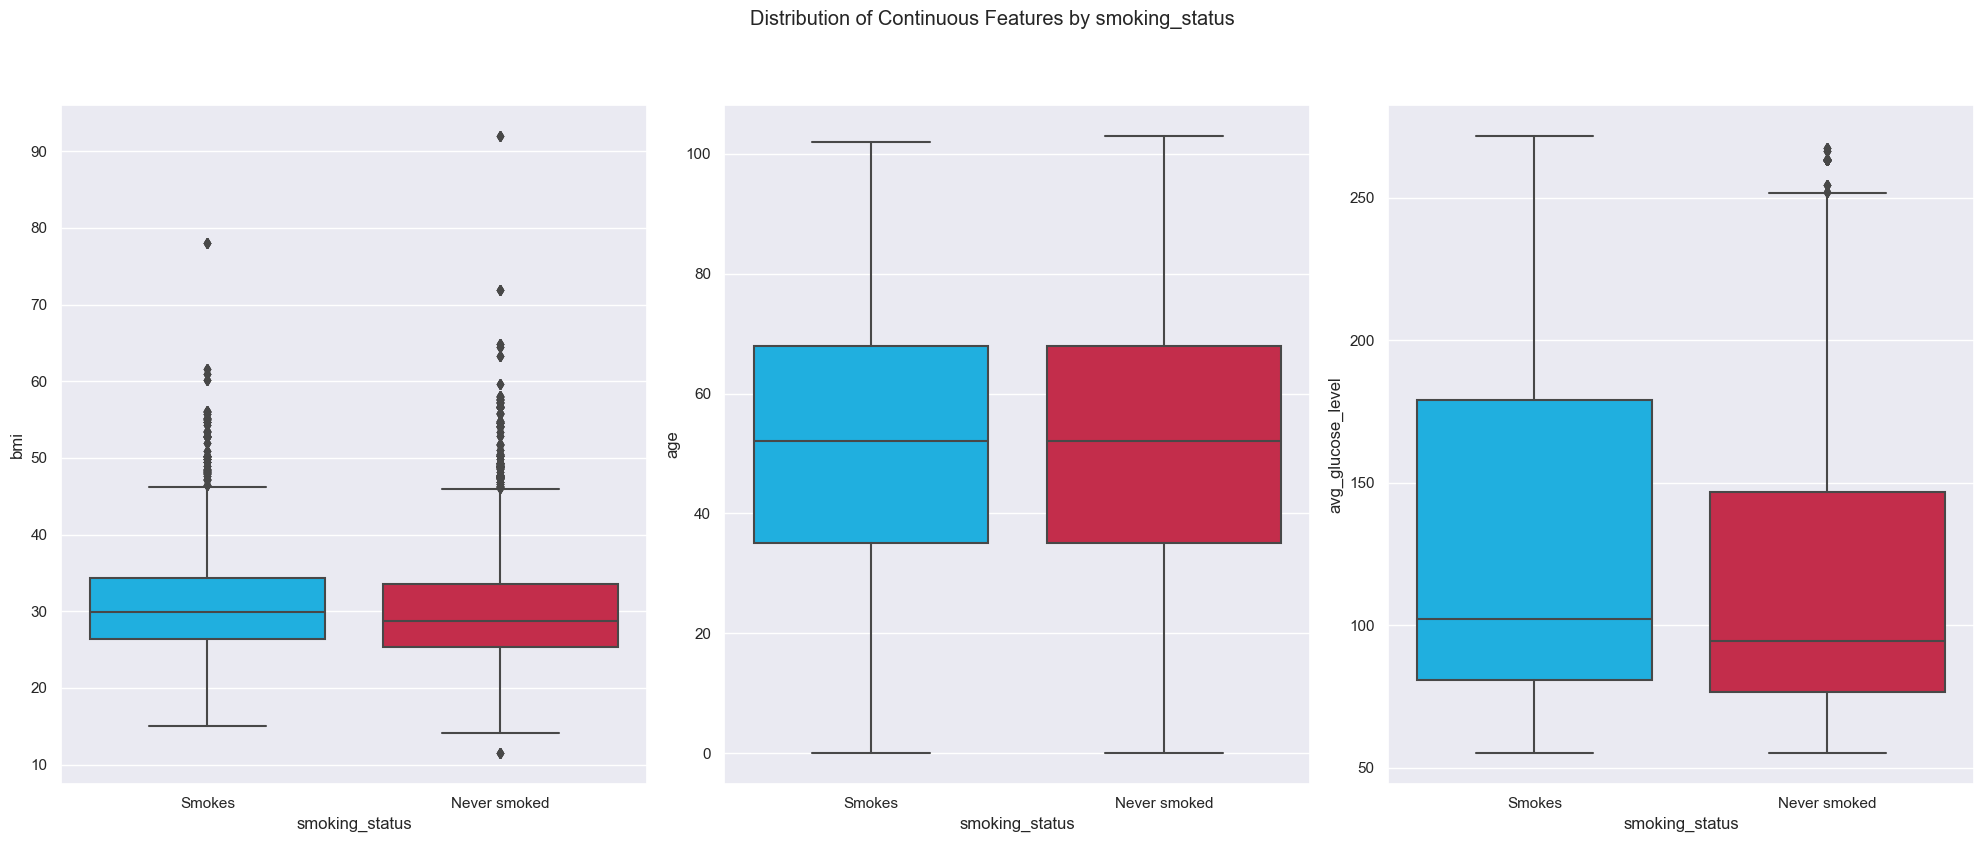

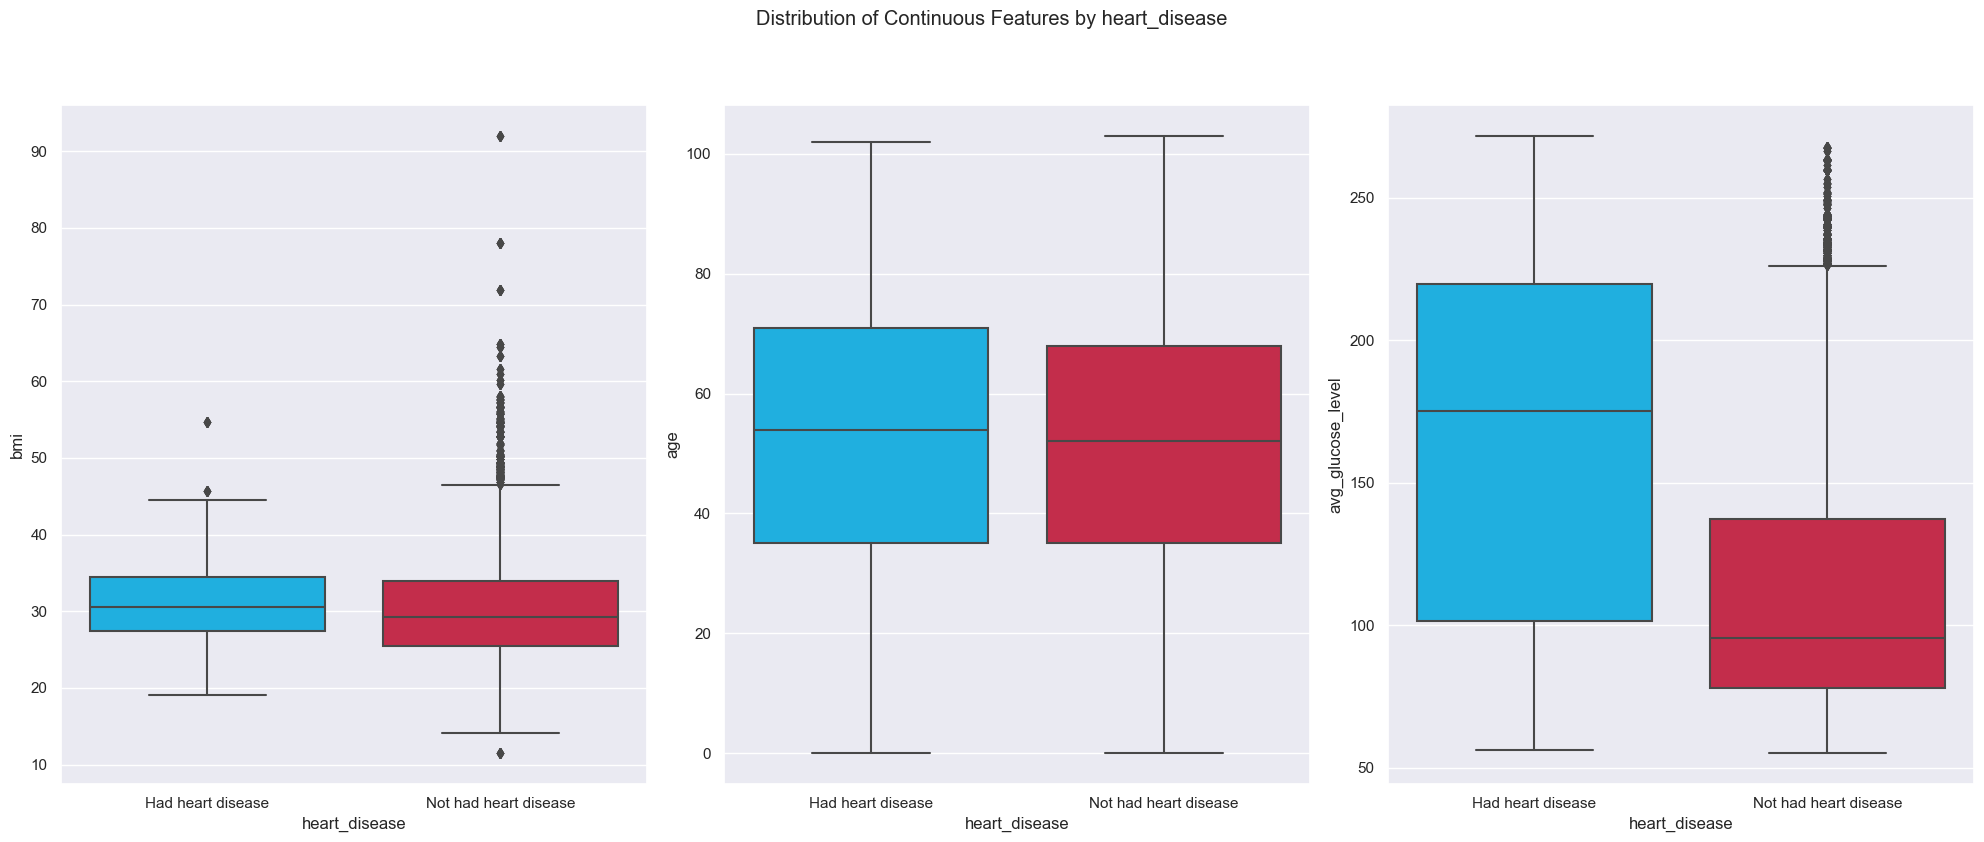

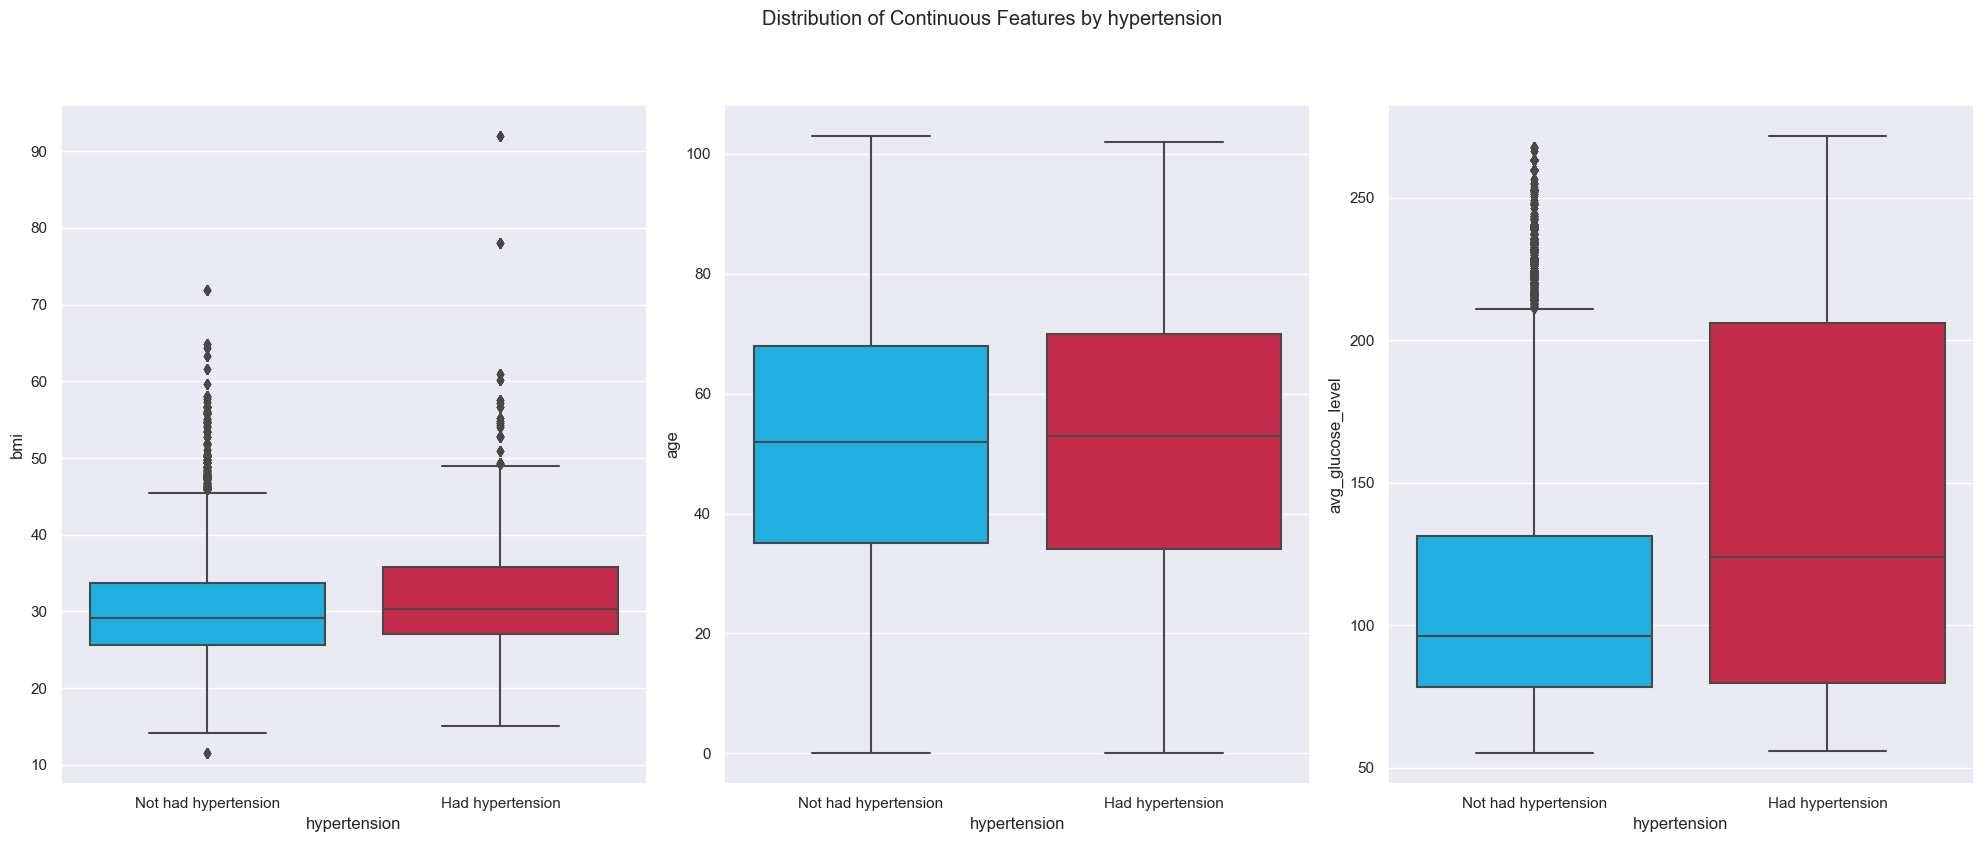

In [43]:
features = ['stroke','smoking_status','heart_disease','hypertension']
for i in enumerate(features):
  box_cols = ['bmi', 'age', 'avg_glucose_level']
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
  fig.suptitle('Distribution of Continuous Features by '+i[1], y = 1.05)
  for col, ax in zip(box_cols, axes.ravel()):
      sns.boxplot(data=df, x=i[1], y=col ,palette = ['deepskyblue','crimson'], ax=ax)
  plt.tight_layout()

The median, range and values in the "avg_glucose_level" feature is higher when there is a stroke / hypertension / heart_disease.

**Data Preparation**

**2.1 Values with low frequency**

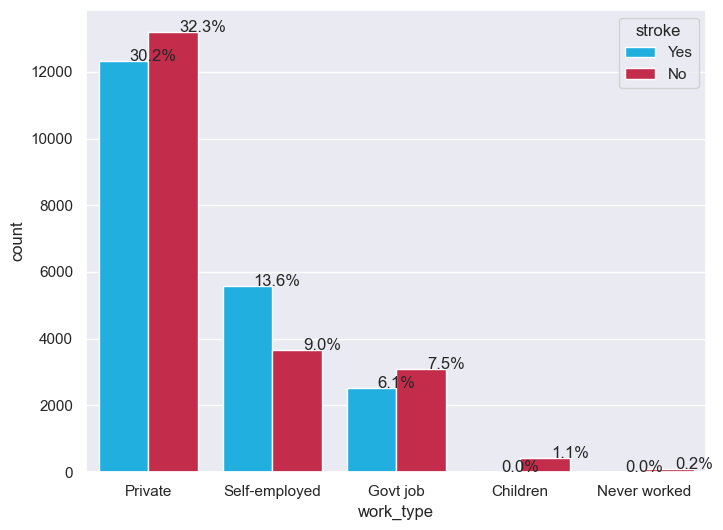

In [44]:
plt.figure(figsize=(8,6))
x = sns.countplot(x = "work_type" ,hue='stroke', data=df, palette = ['deepskyblue','crimson'])
for z in x.patches:
    x.annotate('{:.1f}'.format((z.get_height()/df.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

Only 1.3 percent of the data are divided into the values "children", "never worked". In addition, neither of these two values had a stroke. This data can cause biases, so I will drop these records.

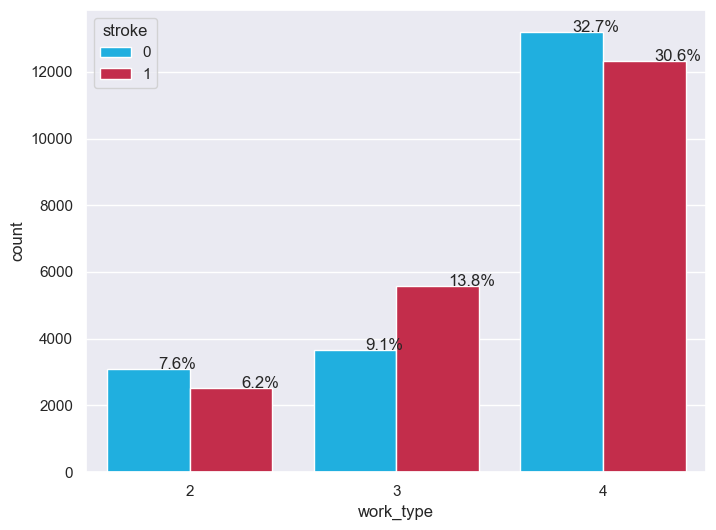

In [45]:
data.drop(data[data.work_type <= 1].index, inplace=True)
plt.figure(figsize=(8,6))
x = sns.countplot(x = "work_type" ,hue='stroke', data=data, palette = ['deepskyblue','crimson'])
for z in x.patches:
    x.annotate('{:.1f}'.format((z.get_height()/data.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

The "work_type" feature is of the Nominal Variable type. Therefore One Hot Encoder must be activated here.

**One Hot Encoder for work type**

In [46]:
data.work_type[data['work_type'] == 2] = 'Govt job'
data.work_type[data['work_type'] == 3] = 'Self-employed'
data.work_type[data['work_type'] == 4] = 'Private'
one_hot_encode_cols = ['work_type']  # filtering by string categoricals
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])
# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)
data.head()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,63.0,0,1,1,1,228.69,36.6,1,1,False,True,False
1,1.0,42.0,0,1,1,0,105.92,32.5,0,1,False,True,False
2,0.0,61.0,0,0,1,1,171.23,34.4,1,1,False,True,False
3,1.0,41.0,1,0,1,0,174.12,24.0,0,1,False,False,True
4,1.0,85.0,0,0,1,1,186.21,29.0,1,1,False,True,False


**2.2 Data Scalling**

Scaling the data for features selection.  Now I use the MinMaxScaler method.

In [47]:
sc = StandardScaler()
data[['bmi']] = sc.fit_transform(data[['bmi']])
data[['age']] = sc.fit_transform(data[['age']])
data[['avg_glucose_level']] = sc.fit_transform(data[['avg_glucose_level']])
data.head()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,0.537117,0,1,1,1,1.841732,0.898248,1,1,False,True,False
1,1.0,-0.436880,0,1,1,0,-0.284421,0.295468,0,1,False,True,False
2,0.0,0.444356,0,0,1,1,0.846629,0.574805,1,1,False,True,False
3,1.0,-0.483261,1,0,1,0,0.896679,-0.954197,0,1,False,False,True
4,1.0,1.557495,0,0,1,1,1.106055,-0.219100,1,1,False,True,False


In [48]:
(data[['bmi','age','avg_glucose_level']]).describe()

,bmi,age,avg_glucose_level
count,4.033300e+04,4.033300e+04,4.033300e+04
mean,2.323670e-16,3.664317e-17,-2.593209e-16
std,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.791941e+00,-2.384874e+00,-1.164185e+00
25%,-6.454564e-01,-7.615457e-01,-7.549562e-01
50%,-1.455902e-01,2.692831e-02,-4.212349e-01
75%,5.306994e-01,7.690215e-01,8.466291e-01
max,9.043127e+00,2.392350e+00,2.587279e+00


In [49]:
y = (data['stroke']).astype(int)
X = data.loc[:, data.columns != 'stroke']  # everything except "stroke"

**2.3 Skewness Checking**

In [50]:
data_skew = data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.067656,False
avg_glucose_level,0.935575,True
bmi,1.100038,True


There are 2 columns with high Skewness. Therefore, we will normalize them using the QuantileTransformer method.

In [51]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
data[['bmi']] = qt.fit_transform(data[['bmi']])
data[['avg_glucose_level']] = qt.fit_transform(data[['avg_glucose_level']])

In [52]:
data_skew = data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.067656,False
avg_glucose_level,0.258523,False
bmi,-0.006102,False


Now, the columns are not skewed.

**2.4 Data Splitting**

In [53]:
y = (data['stroke']).astype(int)
X = data.loc[:, data.columns != 'stroke']  # everything except "stroke"
# X =  X[['sex', 'hypertension', 'heart_disease', 'avg_glucose_level', 'work_type_Self-employed', 'ever_married', 'bmi', 'Residence_type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X)


       sex       age  hypertension  heart_disease  ever_married   
0      1.0  0.537117             0              1             1  \
1      1.0 -0.436880             0              1             1   
2      0.0  0.444356             0              0             1   
3      1.0 -0.483261             1              0             1   
4      1.0  1.557495             0              0             1   
...    ...       ...           ...            ...           ...   
40905  1.0 -0.622403             0              0             0   
40906  0.0  0.073309             0              0             1   
40907  1.0 -0.900688             0              0             1   
40908  1.0 -0.436880             0              0             1   
40909  1.0 -0.761546             0              0             0   

       Residence_type  avg_glucose_level       bmi  smoking_status   
0                   1           1.505232  0.980877               1  \
1                   0           0.197179  0.491254     

**2.5 Train Various of Models**

**Random Forest Classifier**

Validation Accuracy: 0.9957233172182968
training Accuracy: 1.0


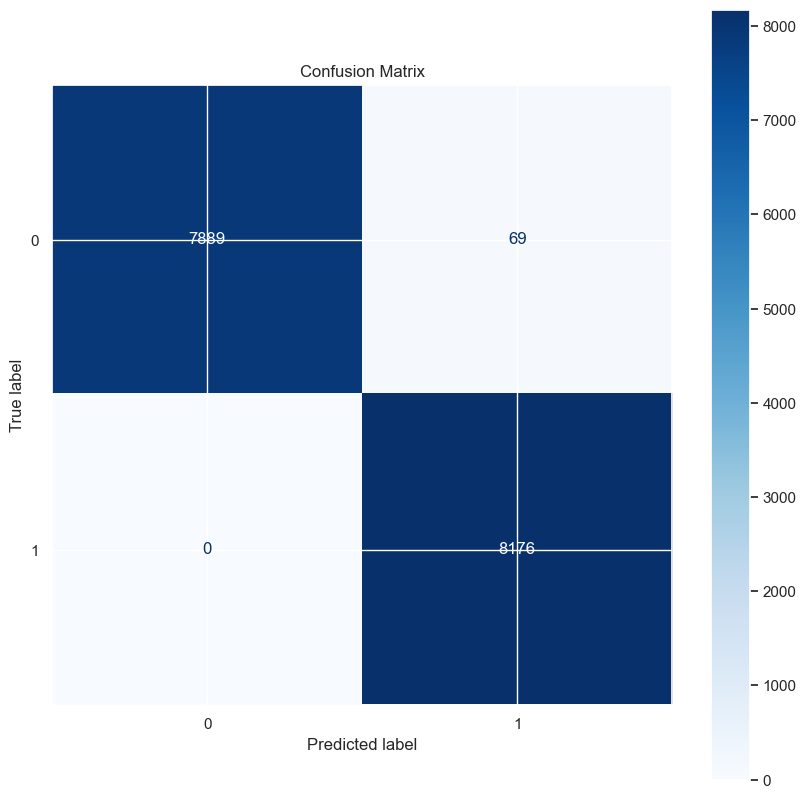

Cross-Validation Accuracy Scores: [0.99776869 0.99814057 0.99392587 0.99739648 0.99900818]
Mean Accuracy: 0.9972479584643994
Standard Deviation: 0.0017449717407818559


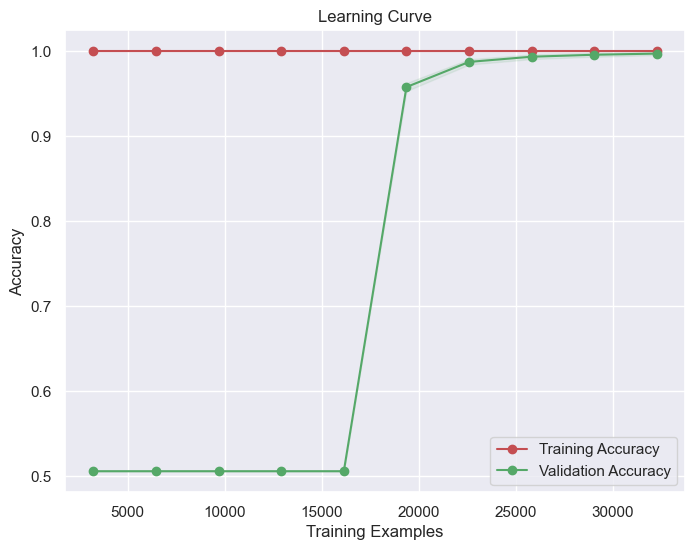

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score


# Train the Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the random forest to the training data
rf_classifier.fit(X_train, y_train)

# Evaluate the Model
# Predict on the validation set
y_pred_test = rf_classifier.predict(X_test)
y_pred_train = rf_classifier.predict(X_train)

# Calculate accuracy on the validation set
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Validation Accuracy:", accuracy_test)
print("training Accuracy:", accuracy_train)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Perform cross validation
scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores:', scores)
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())

# plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X, y, cv=5,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Accuracy')
plt.legend(loc='best')
plt.show()


There is no overfitting, the model results are excellent.

**Logistic Regression**

Validation Accuracy: 0.6780091731746622
training Accuracy: 0.6786644076201496


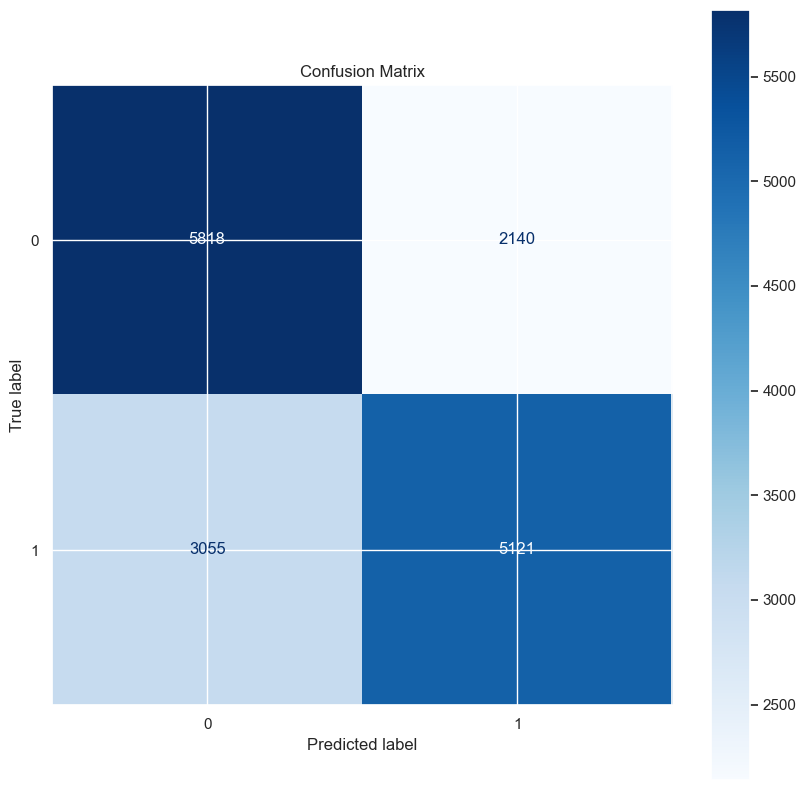

Cross-Validation Accuracy Scores: [0.66034461 0.68588075 0.65005578 0.66724523 0.66092239]
Mean Accuracy: 0.6648897525131314
Standard Deviation: 0.011854240481774402


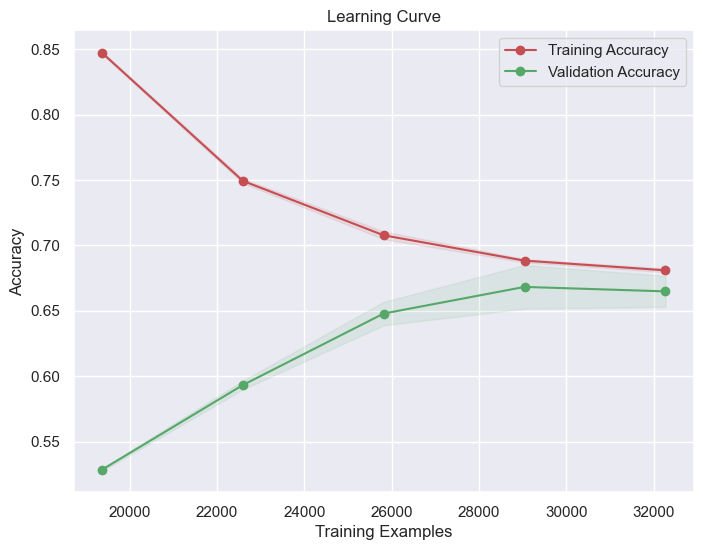

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

# Train the Logistic Regression Classifier
# Define the logistic regression model
logreg_classifier = LogisticRegression()

# Fit the logistic regression model to the training data
logreg_classifier.fit(X_train, y_train)

# Step 3: Evaluate the Model
from sklearn.metrics import accuracy_score

# Predict on the validation set
y_pred_test = logreg_classifier.predict(X_test)
y_pred_train = logreg_classifier.predict(X_train)

# Calculate accuracy on the validation set
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Validation Accuracy:", accuracy_test)
print("training Accuracy:", accuracy_train)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_classifier.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Perform cross validation
scores = cross_val_score(logreg_classifier, X, y, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores:', scores)
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())

# plot learning curve
train_sizes, train_scores, test_scores = learning_curve(logreg_classifier, X, y, cv=5,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Accuracy')
plt.legend(loc='best')
plt.show()



There is no overfitting, but the model results are poor.

**FeedFoward Neural Network**

2023-06-09 12:28:06.320973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
757/757 [==============================] - 4s 3ms/step - loss: 0.9400 - accuracy: 0.6841 - val_loss: 0.6550 - val_accuracy: 0.6889
Epoch 2/10
757/757 [==============================] - 2s 3ms/step - loss: 0.6369 - accuracy: 0.7010 - val_loss: 0.6194 - val_accuracy: 0.7075
Epoch 3/10
757/757 [==============================] - 2s 2ms/step - loss: 0.6150 - accuracy: 0.7067 - val_loss: 0.6059 - val_accuracy: 0.7140
Epoch 4/10
757/757 [==============================] - 2s 2ms/step - loss: 0.6021 - accuracy: 0.7151 - val_loss: 0.5969 - val_accuracy: 0.7163
Epoch 5/10
757/757 [==============================] - 2s 2ms/step - loss: 0.5909 - accuracy: 0.7235 - val_loss: 0.5856 - val_accuracy: 0.7264
Epoch 6/10
757/757 [==============================] - 2s 2ms/step - loss: 0.5823 - accuracy: 0.7283 - val_loss: 0.5833 - val_accuracy: 0.7213
Epoch 7/10
757/757 [==============================] - 2s 2ms/step - loss: 0.5763 - accuracy: 0.7293 - val_loss: 0.5774 - val_accuracy: 0.7300
Epoch 

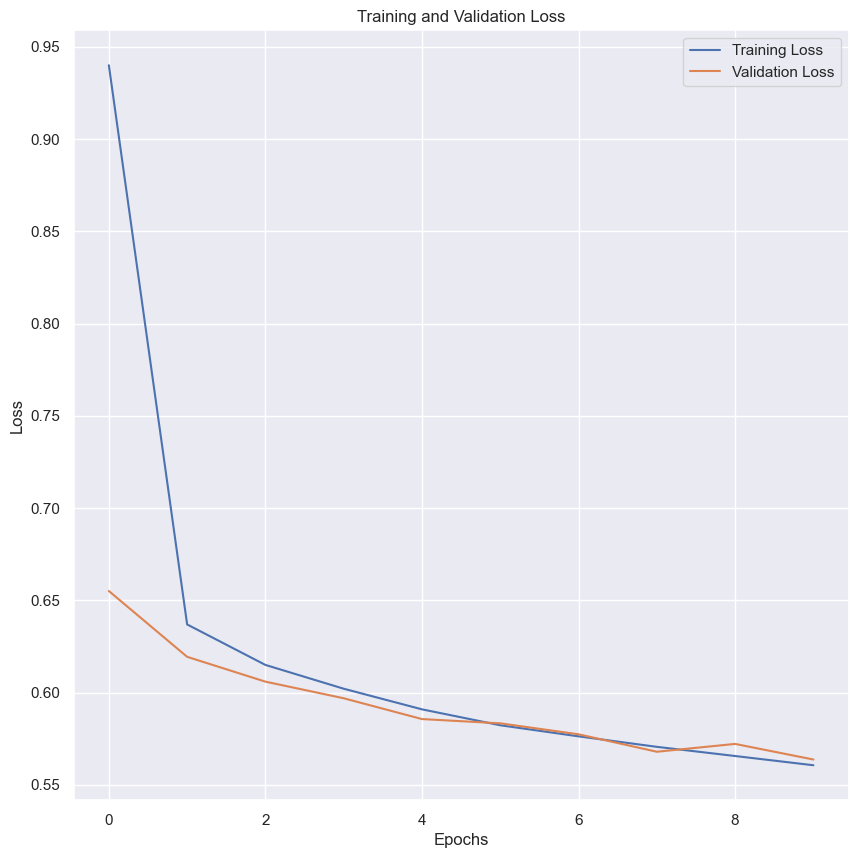

In [56]:
# Train the FNN nueral network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras import regularizers

# Convert X_train and y_train to numpy arrays and ensure the correct data type
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')

# Convert X_test and y_test to numpy arrays and ensure the correct data type
X_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')

# Create the FNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history4 = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

train_loss4 = model.evaluate(X_train, y_train, verbose=0)[0]
val_loss4 = model.evaluate(X_test, y_test, verbose=0)[0]

# Print the training and validation loss values
print("Training Loss:", train_loss4)
print("Validation Loss:", val_loss4)

# Assuming you have already trained your neural network model and obtained the predictions
predictions = model.predict(X_test)

# Convert the predictions into class labels (assuming binary classification)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Display the confusion matrix
print(cm)

# Plot the training and validation loss curves
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


There is a little overfitting, the model results are poor.

**Naive Bayes Classifier**

Validation Accuracy: 0.6606545184083302
training Accuracy: 0.6603578660275218


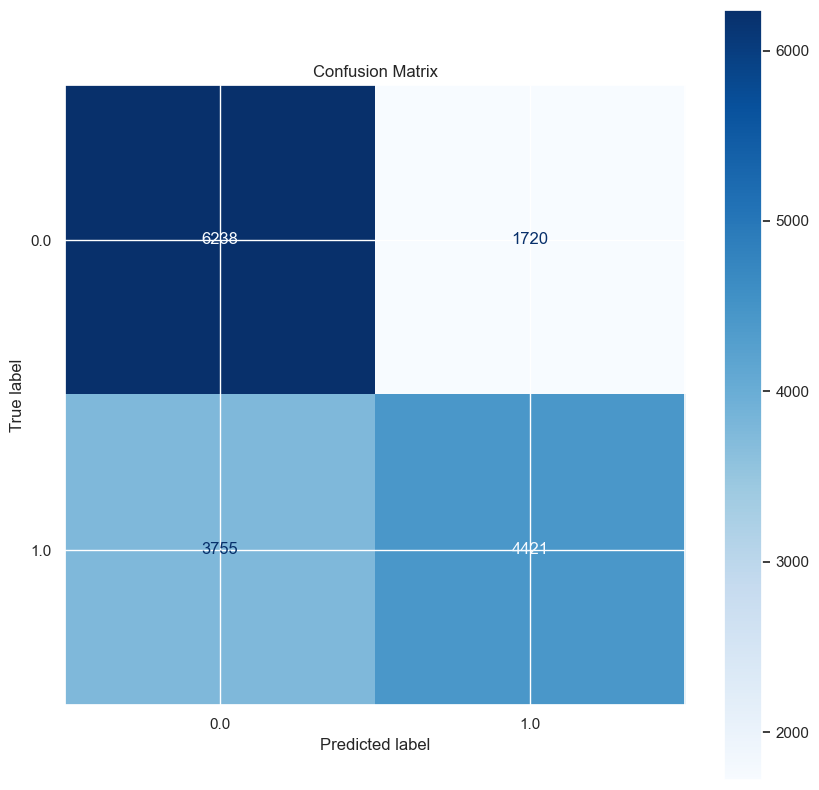

Cross-Validation Accuracy Scores: [0.65538614 0.6555101  0.64621297 0.66017853 0.66179023]
Mean Accuracy: 0.6558155936223565
Standard Deviation: 0.005426226672287009


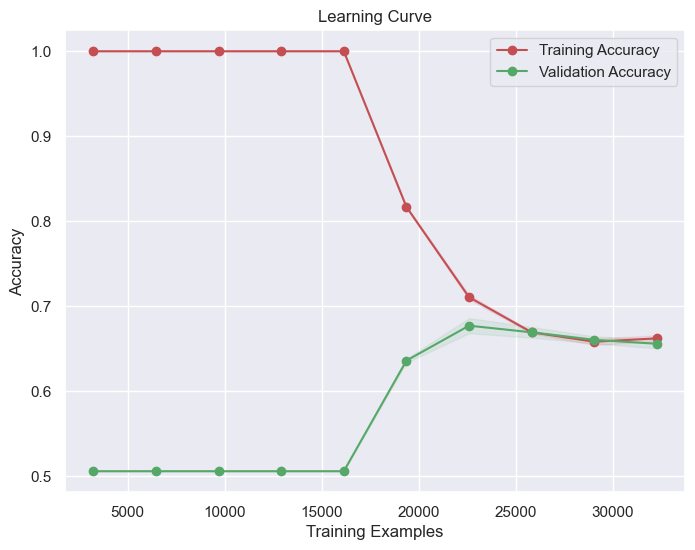

In [57]:
# Train the Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve,  cross_val_score

# Define the Naive Bayes model
nb_classifier = GaussianNB()

# Fit the Naive Bayes model to the training data
nb_classifier.fit(X_train, y_train)

# Evaluate the Model
# Predict on the validation set
y_pred_test = nb_classifier.predict(X_test)
y_pred_train = nb_classifier.predict(X_train)

# Calculate accuracy on the validation set
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Validation Accuracy:", accuracy_test)
print("training Accuracy:", accuracy_train)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# perform cross validation
scores = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores:', scores)
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())
 
# plot learning curve
train_sizes, train_scores, test_scores = learning_curve(nb_classifier, X, y, cv=5,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Accuracy')
plt.legend(loc='best')
plt.show()


There is no overfitting, but the model results are poor.

From thses few models, we decided to choose **Random Forest Classifier**. This is because
- it shows a high accuracy for both testing datasets and training datasets
- both testing datasets and training datasets show a very small difference, indicate it is not overfitting
- high accuracy scores and low standard deviation indicate that the Random Forest Classifier performs well and consistently across different subsets of the data.
- 

**Hyperparameter Tuning**

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'bootstrap' : [True, False]
}

rf_classifier2 = RandomForestClassifier()
random_search = RandomizedSearchCV(rf_classifier2, param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Best Parameters: {'n_estimators': 1000, 'max_features': 'sqrt', 'bootstrap': False}
Best Score: 0.995082371366258


**Evaluate the model with best parameters**

Validation Accuracy: 0.9967769926862526
training Accuracy: 1.0


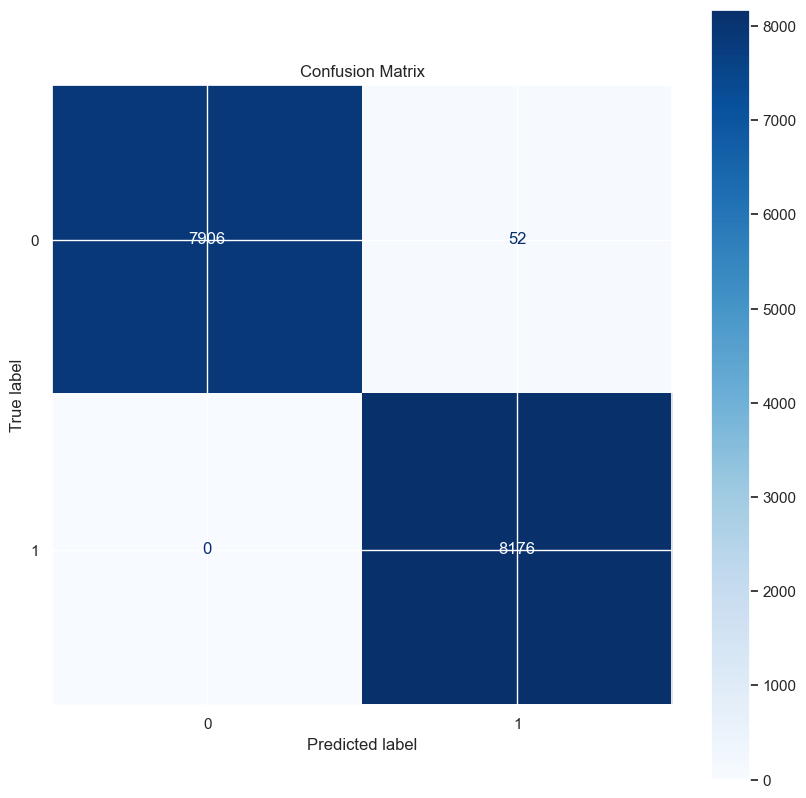

Cross-Validation Accuracy Scores: [0.99776869 0.99814057 0.99392587 0.99739648 0.99900818]
Mean Accuracy: 0.9972479584643994
Standard Deviation: 0.0017449717407818559


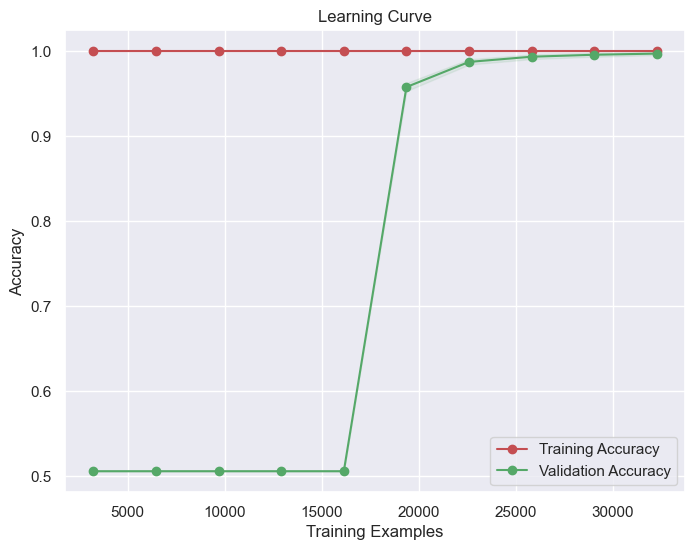

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      7958
         1.0       0.99      1.00      1.00      8176

    accuracy                           1.00     16134
   macro avg       1.00      1.00      1.00     16134
weighted avg       1.00      1.00      1.00     16134

Precision: 0.9936801166747691
Recall: 1.0
F1 Score: 0.9968300414533041
ROC AUC Score: 0.9967328474491078


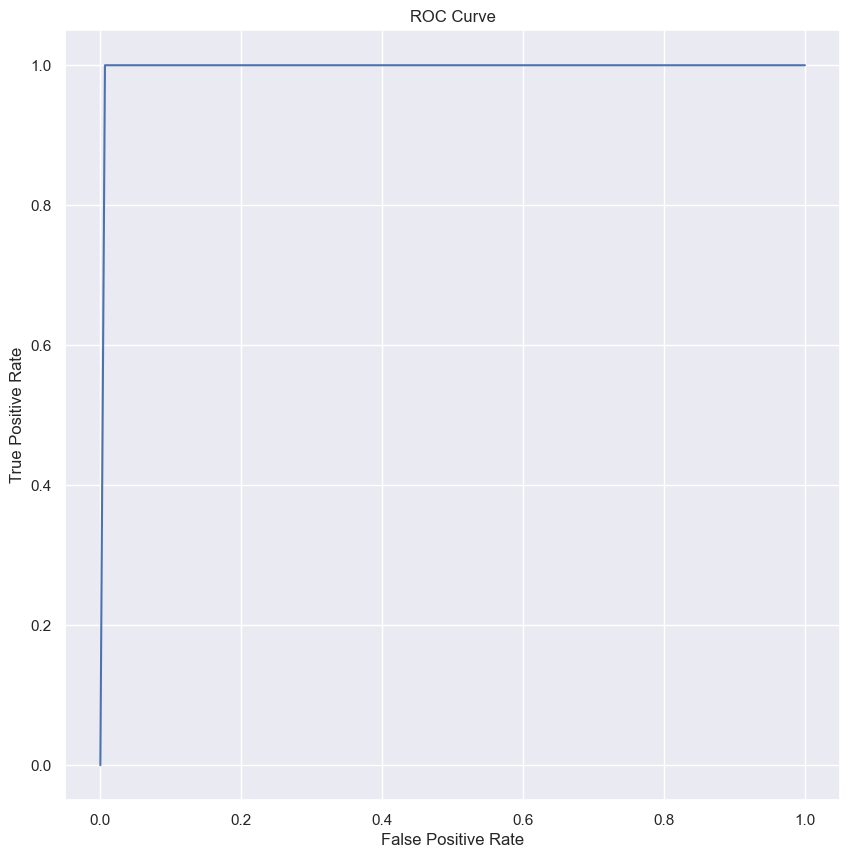

Balanced Accuracy: 0.9967328474491078


In [59]:
rfc = RandomForestClassifier(n_estimators= 500, max_features = 'log2', bootstrap = False)

# Train the model on the full training set
rfc.fit(X_train, y_train)

# Predict on the validation set
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

# Calculate accuracy on the validation set
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Validation Accuracy:", accuracy_test)
print("training Accuracy:", accuracy_train)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Perform cross validation
scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores:', scores)
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())

# plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X, y, cv=5,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Accuracy')
plt.legend(loc='best')
plt.show()


# Generate classification report
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

# Calculate precision score
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Calculate recall score
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_test)
print("ROC AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
print("Balanced Accuracy:", balanced_accuracy)



- high precision 
- high recall 
- high F1 scores indicate that the model achieves a good balance between precision and recall for both classes.
- high ROC AUC - indicate better performance and suggest that the model performs well in distinguishing between the two classes.

In [60]:
# from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler
# import pickle


# sample_data = {
#     'sex': [1],
#     'age': [60],
#     'hypertension': [1],
#     'heart_disease': [1],
#     'ever_married': [0],
#     'work_type': ['Govt job'],
#     'Residence_type': [0],
#     'avg_glucose_level': [300],
#     'bmi': [60],
#     'smoking_status' : [0]
# }


# # sample_data = {
# #     'sex': [1],
# #     'age': [20],
# #     'hypertension': [0],
# #     'heart_disease': [0],
# #     'ever_married': [0],
# #     'work_type': ['Private'],
# #     'Residence_type': [0],
# #     'avg_glucose_level': [100],
# #     'bmi': [20],
# #     'smoking_status' : [0]
# # }


# sample_df = pd.DataFrame(sample_data)
# print(sample_df)


# import numpy as np

# sample_df['work_type_Private'] = np.where(sample_df['work_type'] == 'Private', True, False)
# sample_df['work_type_Govt job'] = np.where(sample_df['work_type'] == 'Govt job', True, False)
# sample_df['work_type_Self-employed'] = np.where(sample_df['work_type'] == 'Self-employed', True, False)

# # Set other work type columns to False
# sample_df['work_type_Govt job'] = np.where(sample_df['work_type_Private'], False, sample_df['work_type_Govt job'])
# sample_df['work_type_Self-employed'] = np.where(sample_df['work_type_Private'], False, sample_df['work_type_Self-employed'])

# print(sample_df)

# # # Apply MinMaxScaler to the numeric columns
# # numeric_columns = ['age', 'avg_glucose_level', 'bmi']
# # scaler = StandardScaler()
# # sample_df[numeric_columns] = scaler.fit_transform(sample_df[numeric_columns])

# # # Define the desired order of columns
# column_order = ['sex', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status',
#                 'work_type_Govt job', 'work_type_Private', 'work_type_Self-employed' ]

# dd = sample_df.copy()
# dd.drop('work_type', axis=1, inplace=True)
# print(dd)

# dd = dd[column_order]
# print(dd)

# print(rfc.predict(dd))

# # Round the value to the nearest integer
# predicted_class = np.round(rfc.predict(dd)).astype(int)

# print(predicted_class)  # Output: [0]

# pickle.dump(rfc, open('rfc.pkl', 'wb'))